<div class="alert alert-info">
    <h2 align="center"> Chronic Kidney Disease Classification</h2>
    <h3 align="center"> Seyyed Hossein Hosseini</h3>
</div>

### Setup

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder   
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold 
import tensorflow
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
import numpy as np
import time
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

In [2]:
# checking if tensorflow is on GPU or on CPU
print(tensorflow.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
data = pd.read_excel('kidney_disease.xlsx')

### Preprocessing

In [4]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
print(type(data))
print(data.shape)
data=data.drop("id",axis=1)
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
(400, 26)
(400, 25)


In [6]:
data.classification.unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [7]:
# ckd\t ---> ckd
data.classification=data.classification.replace("ckd\t","ckd")
data.classification.unique()

array(['ckd', 'notckd'], dtype=object)

In [8]:
# ckd ---> 1   notckd ---> 0
data['classification']=data['classification'].replace(['ckd',"notckd"],[1,0])

**Categorical and discrete numerical features**

In [9]:
print(f"sg: {data['sg'].unique()}")
print(f"al: {data['al'].unique()}")
print(f"su: {data['su'].unique()}")
print(f"rbc: {data['rbc'].unique()}")
print(f"pc: {data['pc'].unique()}")
print(f"pcc: {data['pcc'].unique()}")
print(f"ba: {data['ba'].unique()}")
print(f"htn: {data['htn'].unique()}")
print(f"dm: {data['dm'].unique()}")
print(f"cad: {data['cad'].unique()}")
print(f"appet: {data['appet'].unique()}")
print(f"pe: {data['pe'].unique()}")
print(f"ane: {data['ane'].unique()}")

sg: [1.02  1.01  1.005 1.015   nan 1.025]
al: [ 1.  4.  2.  3.  0. nan  5.]
su: [ 0.  3.  4.  1. nan  2.  5.]
rbc: [nan 'normal' 'abnormal']
pc: ['normal' 'abnormal' nan]
pcc: ['notpresent' 'present' nan]
ba: ['notpresent' 'present' nan]
htn: ['yes' 'no' nan]
dm: ['yes' 'no' ' yes' '\tno' '\tyes' nan]
cad: ['no' 'yes' '\tno' nan]
appet: ['good' 'poor' nan]
pe: ['no' 'yes' nan]
ane: ['no' 'yes' nan]


In [10]:
# data.head() after: ckd ---> 1   notckd ---> 0
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,1
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,1
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,1


In [11]:
data.tail()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,0
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,0
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,0
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,0
399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,131.0,...,53,6800,6.1,no,no,no,good,no,no,0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [13]:
data.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,classification
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,400.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,0.625000
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,0.000000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,0.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,1.000000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,1.000000


**- Converting pcv, wc and rc columns to numerical type**

In [14]:
data['pcv'] = pd.to_numeric(data['pcv'], errors='coerce')
data['wc'] = pd.to_numeric(data['wc'], errors='coerce')
data['rc'] = pd.to_numeric(data['rc'], errors='coerce')

In [15]:
# data.info() after converting pcv, wc and rc columns to numerical type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             329 non-null    float64
 16  wc              294 non-null    float64
 17  rc              269 non-null    flo

In [16]:
# data.describe() after converting pcv, wc and rc columns to numerical type
data.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,classification
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000,400.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435,0.625000
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000,0.000000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000,0.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000,1.000000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000,1.000000


**- Numerical and Categorical Features**

In [17]:
cat_col=[col for col in data.columns if data[col].dtype=="object"]
num_col=[col for col in data.columns if data[col].dtype!="object"]

- Visualizing continuous and discrete numerical features distribution

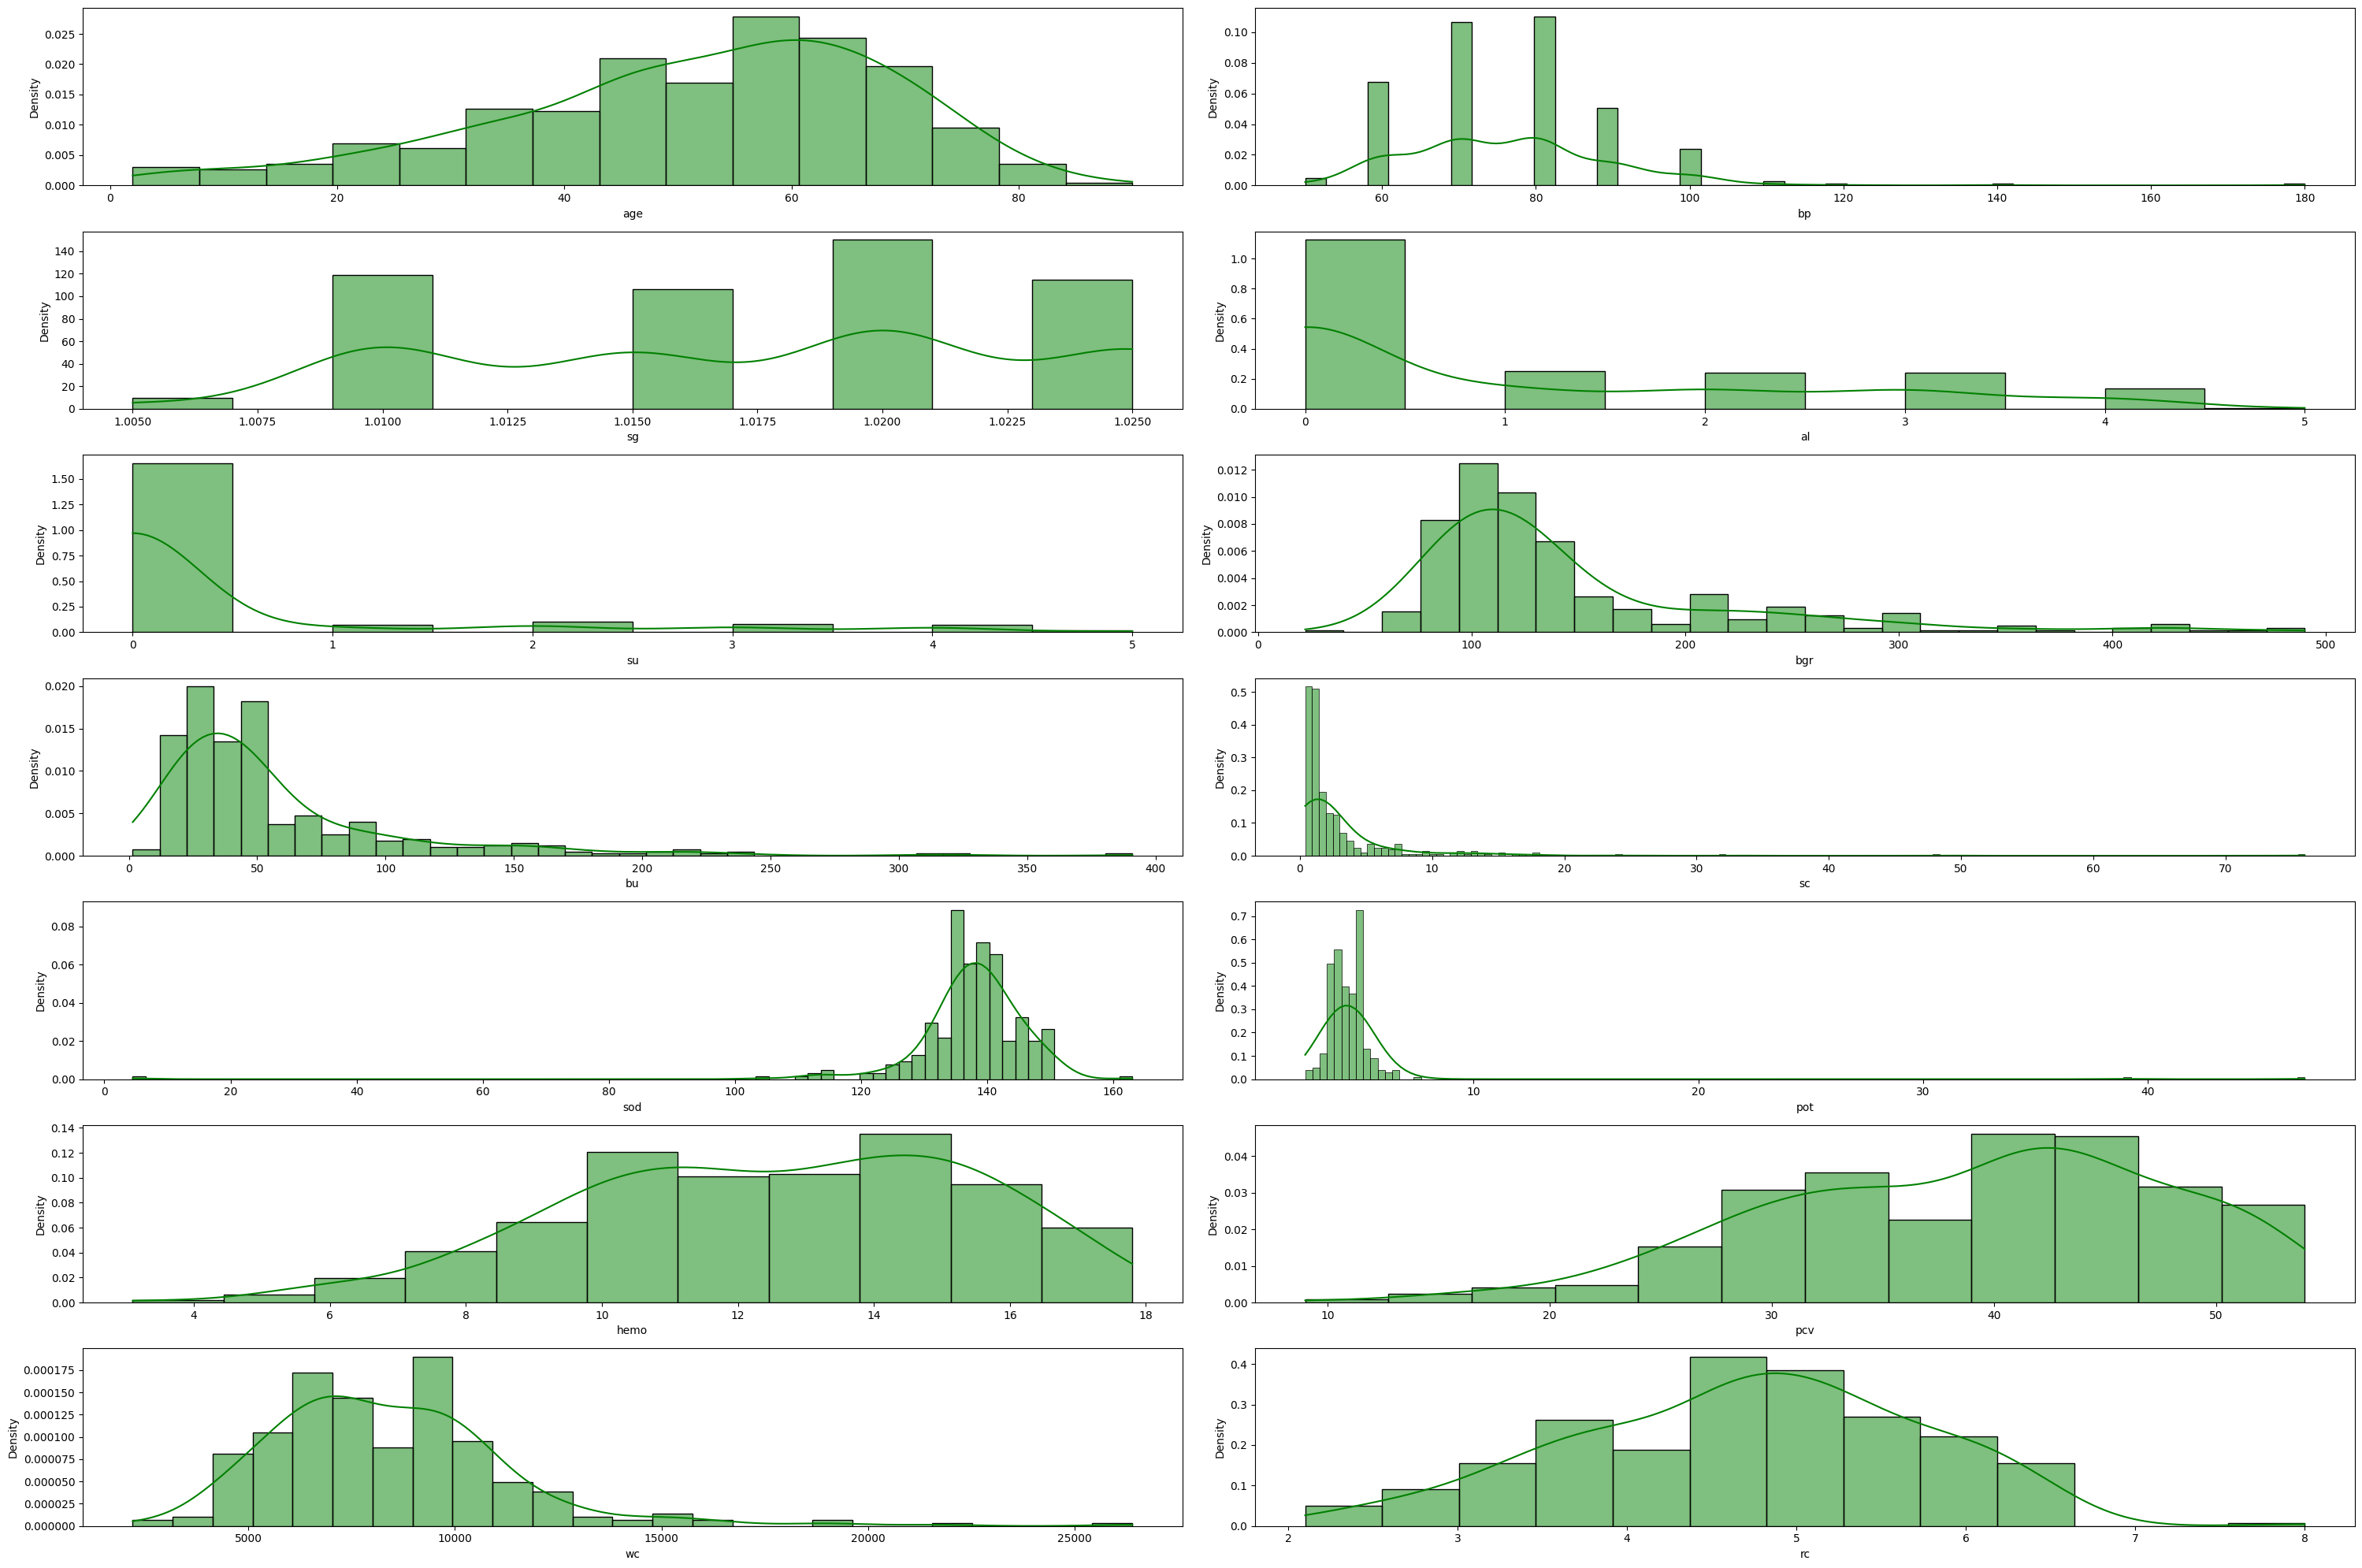

In [18]:
plt.figure(figsize=(30,20))
c=1
for column in num_col:
    if c<=14:
        ax = plt.subplot(7,2,c)
        sns.histplot(data[column], color='green', kde=True, stat='density')
        plt.xlabel(column)
        
    c += 1 
plt.tight_layout()
plt.show()

- Replacing incorrect values in cat_col

In [19]:
for col in cat_col:
    print(f"{col} has {data[col].unique()} values\n")

rbc has [nan 'normal' 'abnormal'] values

pc has ['normal' 'abnormal' nan] values

pcc has ['notpresent' 'present' nan] values

ba has ['notpresent' 'present' nan] values

htn has ['yes' 'no' nan] values

dm has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

cad has ['no' 'yes' '\tno' nan] values

appet has ['good' 'poor' nan] values

pe has ['no' 'yes' nan] values

ane has ['no' 'yes' nan] values



In [20]:
# '\tno' --> 'no'   '\tyes' ---> 'yes'   ' yes' ---> 'yes'
data.dm=data["dm"]. replace( ['\tno','\tyes',' yes' ],["no","yes", 'yes'])
data.cad= data['cad'].replace('\tno','no')

In [21]:
cols = ['dm', 'cad']
for col in cols:
    print(f"{col} has {data[col].unique()} values\n")

dm has ['yes' 'no' nan] values

cad has ['no' 'yes' nan] values



- Visualizing categorical features distribution

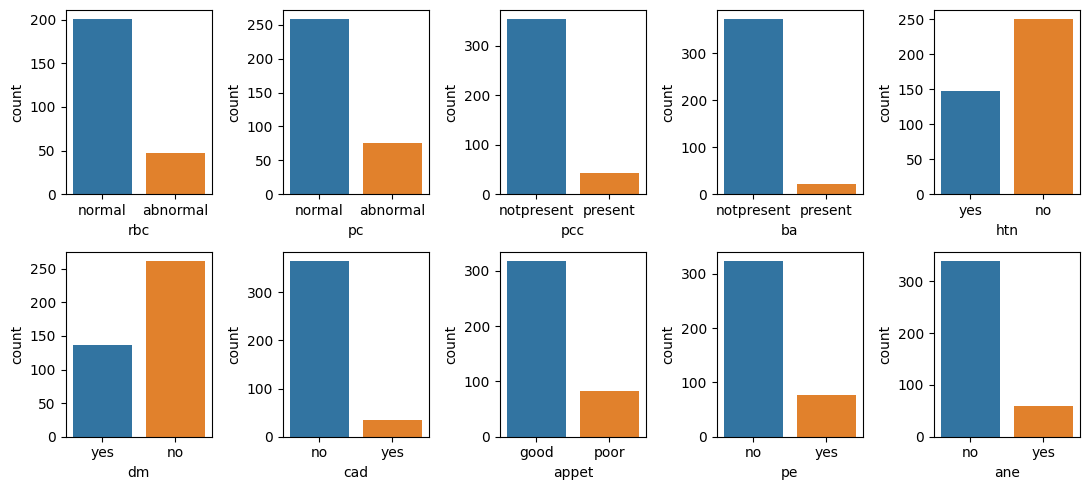

In [22]:
plt.figure(figsize = (11, 5))
c = 1
for column in cat_col:
    if c <= 11:
        ax = plt.subplot(2, 5, c)
        sns.countplot(x = data[column])
        plt.xlabel(column)
        
    c += 1

plt.tight_layout()
plt.show()

**Feature vs Feature**

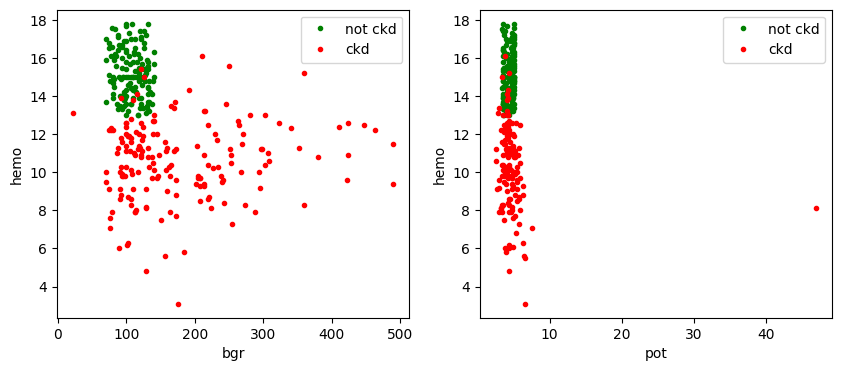

In [23]:
f1 = 'bgr'
f2 = 'hemo'
f3 = 'pot'

plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
plt.plot(data[data['classification'] == 0][f1], data[data['classification'] == 0][f2], 'g.', label='not ckd')
plt.plot(data[data['classification'] == 1][f1], data[data['classification'] == 1][f2], 'r.', label='ckd')
plt.xlabel(f1)
plt.ylabel(f2)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(data[data['classification'] == 0][f3], data[data['classification'] == 0][f2], 'g.', label='not ckd')
plt.plot(data[data['classification'] == 1][f3], data[data['classification'] == 1][f2], 'r.', label='ckd')
plt.xlabel(f3)
plt.ylabel(f2)
plt.legend()
#plt.grid()

**Corelation of features**

In [24]:
# Computing pairwise correlation of features, excluding NA/null values.
# The Pearson correlation coefficient is the most common way of measuring a linear correlation.
# It is a number between –1 and 1 that measures the strength and direction of the relationship
# between two features
data.corr('pearson')

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,classification
age,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928,-0.242119,0.118339,-0.268896,0.227268
bp,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540,-0.326319,0.029753,-0.261936,0.294077
sg,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582,0.603560,-0.236215,0.579476,-0.732163
al,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632,-0.611891,0.231989,-0.566437,0.627090
su,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775,-0.239189,0.184893,-0.237448,0.344070
bgr,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189,-0.301385,0.150015,-0.281541,0.419672
bu,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360,-0.607621,0.050462,-0.579087,0.380605
sc,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670,-0.404193,-0.006390,-0.400852,0.299969
sod,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183,0.376914,0.007277,0.344873,-0.375674
pot,0.058377,0.075151,-0.072787,0.129038,0.219450,0.066966,0.357049,0.326107,0.097887,1.000000,-0.133746,-0.163182,-0.105576,-0.158309,0.084541


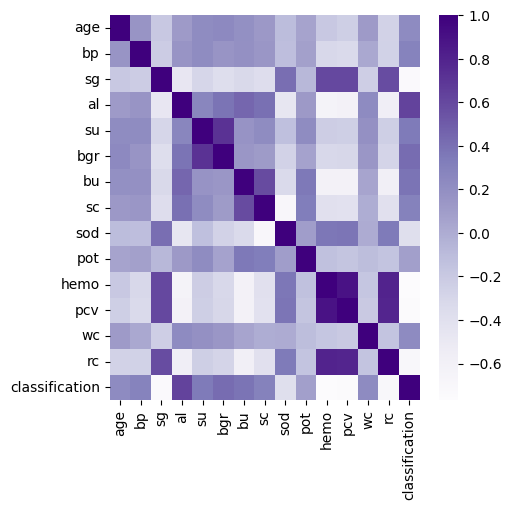

In [25]:
plt.figure(figsize = (5, 5))
sns.heatmap(data.corr('pearson'), cmap='Purples')
plt.show()

**Handling Missing Values(NaN)**

In [26]:
data.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [27]:
# Continuous and dicrete numeric features
# Replacing NaN values with median
for col in num_col:
    data[col]=data[col].fillna(data[col].median())

In [28]:
# Categorical features
# Replacing NaN values with mode
# According to categorical features distribution plot(second plot), the most frequent value(mode) for every 
# categorical feature can be obtained

data['rbc'].fillna('normal',inplace=True)
data["pc"].fillna("normal",inplace=True)
data['pcc'].fillna('notpresent',inplace=True)
data["ba"].fillna("notpresent",inplace=True)
data["htn"].fillna("no",inplace=True) 
data['dm'].fillna('no',inplace=True)
data["cad"].fillna('no',inplace=True)
data["appet"].fillna("good",inplace=True)
data['pe'].fillna('no',inplace=True)
data['ane'].fillna('no',inplace=True)

In [29]:
# Checking whether NaN value exists
data.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

**Encoding Features**

In [30]:
# Features without encoding
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,1
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,121.0,...,38.0,6000.0,4.8,no,no,no,good,no,no,1
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,4.8,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,1


In [31]:
le=LabelEncoder() 
for col in cat_col:
    data[col]=le.fit_transform(data[col])

#features with encoding
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,121.0,...,38.0,6000.0,4.8,0,0,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.8,0,1,0,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,1


**Normalizing Features**

In [32]:
X=data.drop("classification",axis=1)  # feature matrix
y=data["classification"]   # label vector
print(X.shape)
print(y.shape)

(400, 24)
(400,)


In [33]:
# checking skewness of the distributions of numerical features
skew=[]
for column in num_col:
    skew.append(round(data[column].skew(),3))
num_dist=pd.DataFrame({'features':num_col,'skewness':skew})
num_dist

,features,skewness
0,age,-0.689
1,bp,1.602
2,sg,-0.333
3,al,1.180
4,su,2.700
5,bgr,2.204
6,bu,2.724
7,sc,7.666
8,sod,-7.929
9,pot,13.133


There is no feature with skewness between -0.05 and 0.005, Therefore, none of the features
can be assumed to be Gaussian distribution. Thus, normalization is used instead of standardization.

In [34]:
# Normalizing features
# Transforming features by scaling each feature to range (0, 1)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

### K-fold Cross Validation, Model Building and Model Evaluation

**Neural network `without hidden layer`:**

----------------------------------------------------------------------------------------------------
Training for fold 1:
Epoch 1/100
10/10 [==============================] - 12s 210ms/step - loss: 0.7670 - accuracy: 0.5400 - val_loss: 0.8216 - val_accuracy: 0.4900
Epoch 2/100
10/10 [==============================] - 0s 30ms/step - loss: 0.7444 - accuracy: 0.5733 - val_loss: 0.8008 - val_accuracy: 0.5200
Epoch 3/100
10/10 [==============================] - 0s 24ms/step - loss: 0.7254 - accuracy: 0.5967 - val_loss: 0.7822 - val_accuracy: 0.5400
Epoch 4/100
10/10 [==============================] - 0s 19ms/step - loss: 0.7081 - accuracy: 0.6467 - val_loss: 0.7653 - val_accuracy: 0.5500
Epoch 5/100
10/10 [==============================] - 0s 18ms/step - loss: 0.6929 - accuracy: 0.6467 - val_loss: 0.7501 - val_accuracy: 0.5300
Epoch 6/100
10/10 [==============================] - 0s 26ms/step - loss: 0.6785 - accuracy: 0.6467 - val_loss: 0.7373 - val_accuracy: 0.5100
Epoch 7/100
10/10 [=====

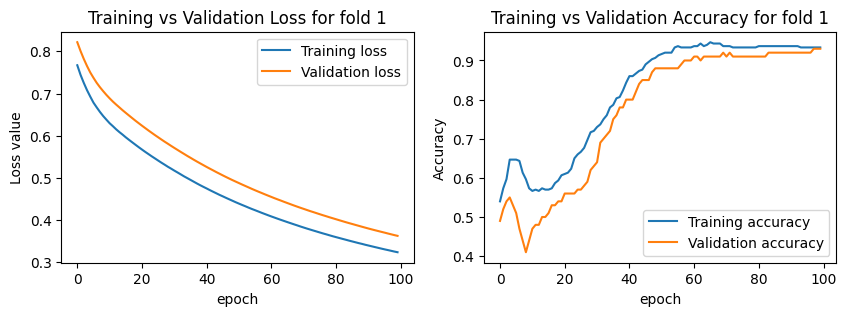

----------------------------------------------------------------------------------------------------
Training for fold 2:
Epoch 1/100
10/10 [==============================] - 1s 45ms/step - loss: 0.6971 - accuracy: 0.5133 - val_loss: 0.6597 - val_accuracy: 0.4400
Epoch 2/100
10/10 [==============================] - 0s 21ms/step - loss: 0.6828 - accuracy: 0.4967 - val_loss: 0.6537 - val_accuracy: 0.3900
Epoch 3/100
10/10 [==============================] - 0s 15ms/step - loss: 0.6707 - accuracy: 0.4800 - val_loss: 0.6486 - val_accuracy: 0.4100
Epoch 4/100
10/10 [==============================] - 0s 15ms/step - loss: 0.6591 - accuracy: 0.4900 - val_loss: 0.6443 - val_accuracy: 0.4300
Epoch 5/100
10/10 [==============================] - 0s 17ms/step - loss: 0.6491 - accuracy: 0.4900 - val_loss: 0.6403 - val_accuracy: 0.4300
Epoch 6/100
10/10 [==============================] - 0s 17ms/step - loss: 0.6403 - accuracy: 0.4967 - val_loss: 0.6362 - val_accuracy: 0.4400
Epoch 7/100
10/10 [=======

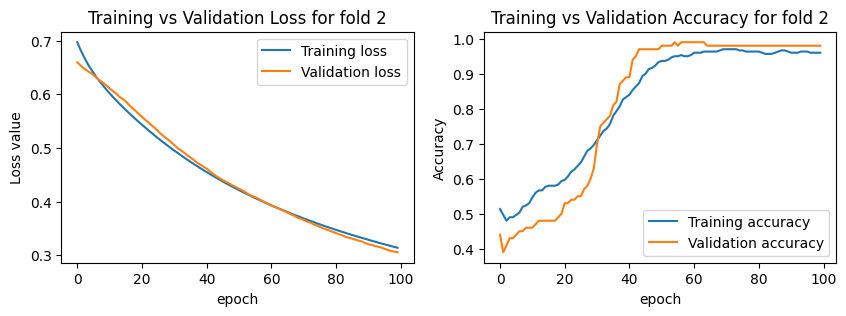

----------------------------------------------------------------------------------------------------
Training for fold 3:
Epoch 1/100
10/10 [==============================] - 1s 37ms/step - loss: 0.6719 - accuracy: 0.6133 - val_loss: 0.6767 - val_accuracy: 0.5600
Epoch 2/100
10/10 [==============================] - 0s 17ms/step - loss: 0.6568 - accuracy: 0.6433 - val_loss: 0.6557 - val_accuracy: 0.6000
Epoch 3/100
10/10 [==============================] - 0s 16ms/step - loss: 0.6418 - accuracy: 0.6733 - val_loss: 0.6378 - val_accuracy: 0.6300
Epoch 4/100
10/10 [==============================] - 0s 16ms/step - loss: 0.6300 - accuracy: 0.7167 - val_loss: 0.6214 - val_accuracy: 0.7000
Epoch 5/100
10/10 [==============================] - 0s 16ms/step - loss: 0.6184 - accuracy: 0.7467 - val_loss: 0.6073 - val_accuracy: 0.7900
Epoch 6/100
10/10 [==============================] - 0s 16ms/step - loss: 0.6089 - accuracy: 0.7800 - val_loss: 0.5936 - val_accuracy: 0.8200
Epoch 7/100
10/10 [=======

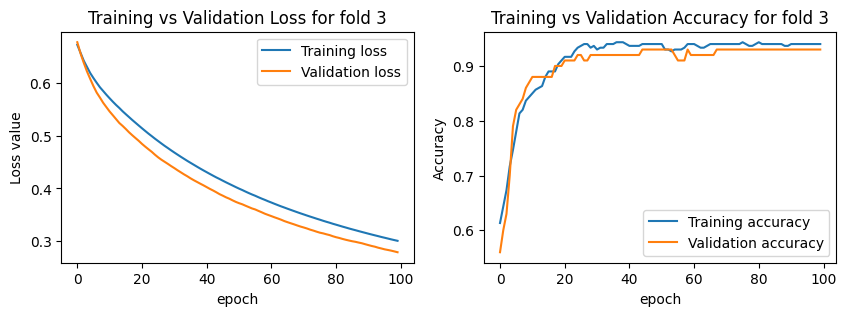

----------------------------------------------------------------------------------------------------
Training for fold 4:
Epoch 1/100
10/10 [==============================] - 1s 44ms/step - loss: 0.6728 - accuracy: 0.5100 - val_loss: 0.6742 - val_accuracy: 0.4900
Epoch 2/100
10/10 [==============================] - 0s 17ms/step - loss: 0.6628 - accuracy: 0.5167 - val_loss: 0.6652 - val_accuracy: 0.4900
Epoch 3/100
10/10 [==============================] - 0s 19ms/step - loss: 0.6532 - accuracy: 0.5333 - val_loss: 0.6563 - val_accuracy: 0.5000
Epoch 4/100
10/10 [==============================] - 0s 17ms/step - loss: 0.6440 - accuracy: 0.5333 - val_loss: 0.6477 - val_accuracy: 0.5000
Epoch 5/100
10/10 [==============================] - 0s 16ms/step - loss: 0.6349 - accuracy: 0.5400 - val_loss: 0.6395 - val_accuracy: 0.5100
Epoch 6/100
10/10 [==============================] - 0s 17ms/step - loss: 0.6262 - accuracy: 0.5533 - val_loss: 0.6314 - val_accuracy: 0.5200
Epoch 7/100
10/10 [=======

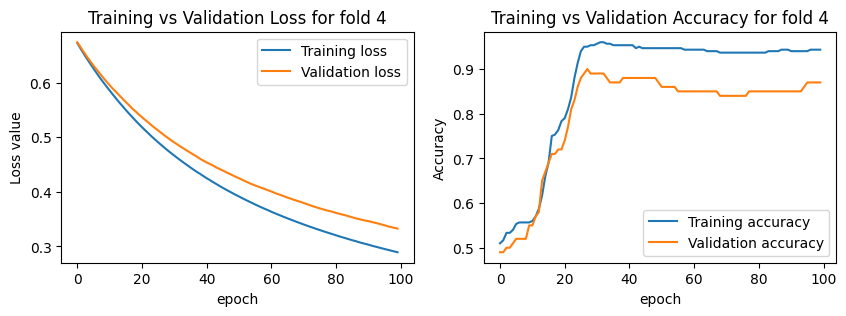

----------------------------------------------------------------------------------------------------
Score per fold
----------------------------------------------------------------------------------------------------
> Fold 1 - Loss: 0.3628315031528473 - Accuracy: 93.00000071525574%
----------------------------------------------------------------------------------------------------
> Fold 2 - Loss: 0.3055925667285919 - Accuracy: 98.00000190734863%
----------------------------------------------------------------------------------------------------
> Fold 3 - Loss: 0.2794056236743927 - Accuracy: 93.00000071525574%
----------------------------------------------------------------------------------------------------
> Fold 4 - Loss: 0.33273234963417053 - Accuracy: 87.00000047683716%
----------------------------------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 92.75000095367432 (+- 3.8971148064558707)
> Loss: 0.3201405107975006

In [48]:
num_folds = 4
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=12)
acc_per_fold = []
loss_per_fold = []

num_epochs = 100
# K-fold Cross Validation model evaluation
fold = 1
for train, test in kfold.split(X, y):

  # Define the model architecture: neural network without hidden layer
  model = Sequential()
  # output layer
  model.add(Dense(1, input_dim=X.shape[1], activation='sigmoid'))

  # Compile the model
  model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])


  print('-----'*20)
  print(f'Training for fold {fold}:')

  # Fit data to model
  history = model.fit(X[train], y[train],
              epochs=num_epochs,
              validation_data=(X[test], y[test]),
              verbose=1)

  # Validation metrics
  scores = model.evaluate(X[test], y[test], verbose=0)
  print(f'Score for fold {fold}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])
  
  # plotting loss
  plt.figure(figsize=(10, 3))
  plt.subplot(1, 2, 1)
  plt.plot(history.history['loss'], label="Training loss")
  plt.plot(history.history['val_loss'], label="Validation loss")
  plt.legend()
  plt.title(f"Training vs Validation Loss for fold {fold}")
  plt.ylabel('Loss value')
  plt.xlabel('epoch')  
  
  # plotting accuracy
  plt.subplot(1, 2, 2)
  plt.plot(history.history['accuracy'], label="Training accuracy")
  plt.plot(history.history['val_accuracy'], label="Validation accuracy")
  plt.legend()
  plt.title(f"Training vs Validation Accuracy for fold {fold}")
  plt.ylabel('Accuracy')
  plt.xlabel('epoch')
  plt.show()

  fold = fold + 1

# Average scores
print('-----'*20)
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('-----'*20)
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('-----'*20)
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')


**Neural network with `one` hidden layer and `without activtion function` for `different number of hidden unit`**

----------------------------------------------------------------------------------------------------
Training for fold 1:
Epoch 1/100
10/10 [==============================] - 1s 36ms/step - loss: 0.6488 - accuracy: 0.5333 - val_loss: 0.6552 - val_accuracy: 0.4900
Epoch 2/100
10/10 [==============================] - 0s 17ms/step - loss: 0.6249 - accuracy: 0.5633 - val_loss: 0.6332 - val_accuracy: 0.5300
Epoch 3/100
10/10 [==============================] - 0s 17ms/step - loss: 0.6024 - accuracy: 0.5867 - val_loss: 0.6117 - val_accuracy: 0.5500
Epoch 4/100
10/10 [==============================] - 0s 18ms/step - loss: 0.5802 - accuracy: 0.6033 - val_loss: 0.5909 - val_accuracy: 0.5800
Epoch 5/100
10/10 [==============================] - 0s 18ms/step - loss: 0.5599 - accuracy: 0.6200 - val_loss: 0.5710 - val_accuracy: 0.6100
Epoch 6/100
10/10 [==============================] - 0s 18ms/step - loss: 0.5398 - accuracy: 0.6767 - val_loss: 0.5520 - val_accuracy: 0.6900
Epoch 7/100
10/10 [=======

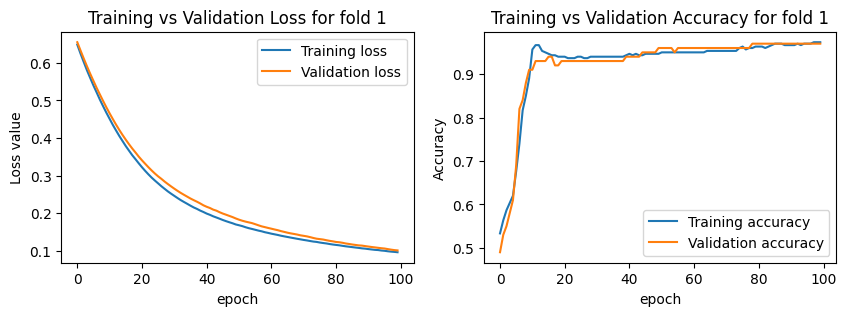

----------------------------------------------------------------------------------------------------
Training for fold 2:
Epoch 1/100
10/10 [==============================] - 1s 37ms/step - loss: 0.5992 - accuracy: 0.6500 - val_loss: 0.6365 - val_accuracy: 0.4400
Epoch 2/100
10/10 [==============================] - 0s 17ms/step - loss: 0.5721 - accuracy: 0.5700 - val_loss: 0.6205 - val_accuracy: 0.4600
Epoch 3/100
10/10 [==============================] - 0s 17ms/step - loss: 0.5502 - accuracy: 0.5933 - val_loss: 0.6019 - val_accuracy: 0.5300
Epoch 4/100
10/10 [==============================] - 0s 16ms/step - loss: 0.5313 - accuracy: 0.6133 - val_loss: 0.5819 - val_accuracy: 0.5300
Epoch 5/100
10/10 [==============================] - 0s 17ms/step - loss: 0.5132 - accuracy: 0.6267 - val_loss: 0.5602 - val_accuracy: 0.5500
Epoch 6/100
10/10 [==============================] - 0s 16ms/step - loss: 0.4962 - accuracy: 0.6433 - val_loss: 0.5384 - val_accuracy: 0.6100
Epoch 7/100
10/10 [=======

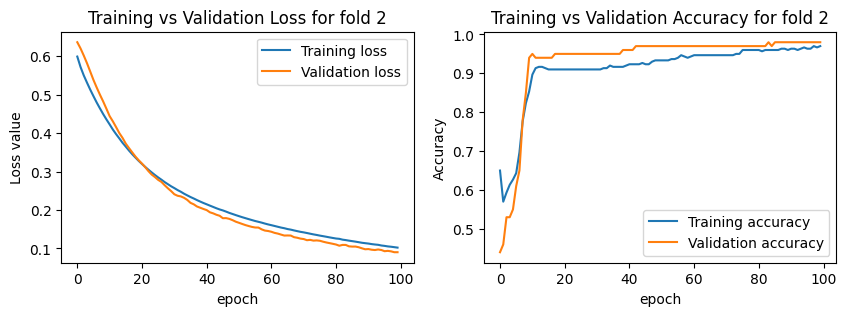

----------------------------------------------------------------------------------------------------
Training for fold 3:
Epoch 1/100
10/10 [==============================] - 1s 39ms/step - loss: 0.5930 - accuracy: 0.6033 - val_loss: 0.5487 - val_accuracy: 0.6900
Epoch 2/100
10/10 [==============================] - 0s 18ms/step - loss: 0.5753 - accuracy: 0.6333 - val_loss: 0.5356 - val_accuracy: 0.7200
Epoch 3/100
10/10 [==============================] - 0s 17ms/step - loss: 0.5591 - accuracy: 0.7200 - val_loss: 0.5228 - val_accuracy: 0.8200
Epoch 4/100
10/10 [==============================] - 0s 17ms/step - loss: 0.5432 - accuracy: 0.8267 - val_loss: 0.5075 - val_accuracy: 0.8800
Epoch 5/100
10/10 [==============================] - 0s 16ms/step - loss: 0.5282 - accuracy: 0.8933 - val_loss: 0.4922 - val_accuracy: 0.9500
Epoch 6/100
10/10 [==============================] - 0s 18ms/step - loss: 0.5134 - accuracy: 0.9400 - val_loss: 0.4792 - val_accuracy: 0.9700
Epoch 7/100
10/10 [=======

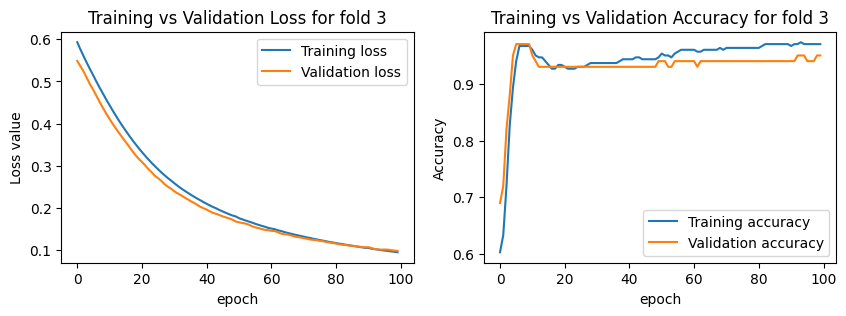

----------------------------------------------------------------------------------------------------
Training for fold 4:
Epoch 1/100
10/10 [==============================] - 1s 37ms/step - loss: 0.7988 - accuracy: 0.4733 - val_loss: 0.7498 - val_accuracy: 0.5500
Epoch 2/100
10/10 [==============================] - 0s 17ms/step - loss: 0.7667 - accuracy: 0.5033 - val_loss: 0.7204 - val_accuracy: 0.5600
Epoch 3/100
10/10 [==============================] - 0s 16ms/step - loss: 0.7370 - accuracy: 0.5433 - val_loss: 0.6932 - val_accuracy: 0.6000
Epoch 4/100
10/10 [==============================] - 0s 17ms/step - loss: 0.7082 - accuracy: 0.5833 - val_loss: 0.6681 - val_accuracy: 0.6400
Epoch 5/100
10/10 [==============================] - 0s 22ms/step - loss: 0.6816 - accuracy: 0.5967 - val_loss: 0.6442 - val_accuracy: 0.6500
Epoch 6/100
10/10 [==============================] - 0s 22ms/step - loss: 0.6564 - accuracy: 0.5967 - val_loss: 0.6213 - val_accuracy: 0.6500
Epoch 7/100
10/10 [=======

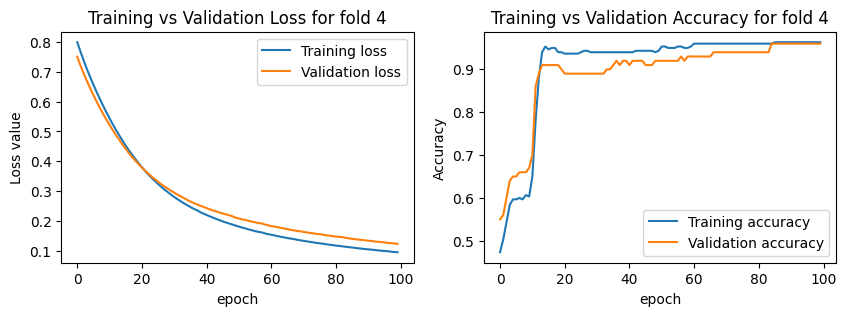

----------------------------------------------------------------------------------------------------
Score per fold
----------------------------------------------------------------------------------------------------
> Fold 1 - Loss: 0.10045474767684937 - Accuracy: 97.00000286102295%
----------------------------------------------------------------------------------------------------
> Fold 2 - Loss: 0.09007829427719116 - Accuracy: 98.00000190734863%
----------------------------------------------------------------------------------------------------
> Fold 3 - Loss: 0.09829360246658325 - Accuracy: 94.9999988079071%
----------------------------------------------------------------------------------------------------
> Fold 4 - Loss: 0.1234845221042633 - Accuracy: 95.99999785423279%
----------------------------------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 96.50000035762787 (+- 1.1180355881111392)
> Loss: 0.103077791631221

In [41]:
num_folds = 4
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=12)
acc_per_fold = []
loss_per_fold = []

num_epochs = 100
# K-fold Cross Validation model evaluation
fold = 1
for train, test in kfold.split(X, y):

  # Define the model architecture: neural network with one hidden layer and without activation function
  model = Sequential()
  # hidden layer
  # 9 numbers for hidden units: 1, 6, 12, 18, 24, 30, 36, 42, 48
  model.add(Dense(units=6, input_dim=X.shape[1]))
  # output layer
  model.add(Dense(units=1, activation='sigmoid'))

  # Compile the model
  model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])


  print('-----'*20)
  print(f'Training for fold {fold}:')

  # Fit data to model
  history = model.fit(X[train], y[train],
              epochs=num_epochs,
              validation_data=(X[test], y[test]),
              verbose=1)

  # Validation metrics
  scores = model.evaluate(X[test], y[test], verbose=0)
  print(f'Score for fold {fold}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])
    
  # plotting loss
  plt.figure(figsize=(10, 3))
  plt.subplot(1, 2, 1)
  plt.plot(history.history['loss'], label="Training loss")
  plt.plot(history.history['val_loss'], label="Validation loss")
  plt.legend()
  plt.title(f"Training vs Validation Loss for fold {fold}")
  plt.ylabel('Loss value')
  plt.xlabel('epoch')  
  
  # plotting accuracy
  plt.subplot(1, 2, 2)
  plt.plot(history.history['accuracy'], label="Training accuracy")
  plt.plot(history.history['val_accuracy'], label="Validation accuracy")
  plt.legend()
  plt.title(f"Training vs Validation Accuracy for fold {fold}")
  plt.ylabel('Accuracy')
  plt.xlabel('epoch')
  plt.show()

  fold = fold + 1

# Average scores
print('-----'*20)
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('-----'*20)
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('-----'*20)
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')


**Neural network with `one` hidden layer and with `different activtion function` (ReLU, Tanh, Sigmoid and without activation function)**

----------------------------------------------------------------------------------------------------
Training for fold 1:
Epoch 1/100
10/10 [==============================] - 1s 37ms/step - loss: 0.6124 - accuracy: 0.7567 - val_loss: 0.5728 - val_accuracy: 0.6400
Epoch 2/100
10/10 [==============================] - 0s 19ms/step - loss: 0.5270 - accuracy: 0.6433 - val_loss: 0.5146 - val_accuracy: 0.6400
Epoch 3/100
10/10 [==============================] - 0s 17ms/step - loss: 0.4687 - accuracy: 0.8133 - val_loss: 0.4570 - val_accuracy: 0.9800
Epoch 4/100
10/10 [==============================] - 0s 17ms/step - loss: 0.4182 - accuracy: 0.9467 - val_loss: 0.4107 - val_accuracy: 0.9500
Epoch 5/100
10/10 [==============================] - 0s 17ms/step - loss: 0.3767 - accuracy: 0.9367 - val_loss: 0.3735 - val_accuracy: 0.9400
Epoch 6/100
10/10 [==============================] - 0s 17ms/step - loss: 0.3425 - accuracy: 0.9367 - val_loss: 0.3423 - val_accuracy: 0.9500
Epoch 7/100
10/10 [=======

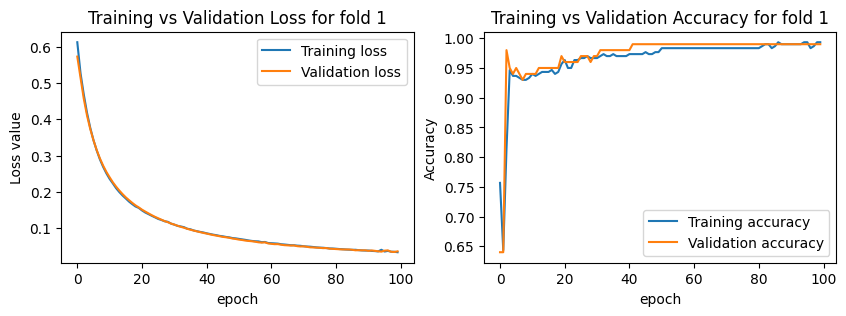

----------------------------------------------------------------------------------------------------
Training for fold 2:
Epoch 1/100
10/10 [==============================] - 1s 38ms/step - loss: 0.7026 - accuracy: 0.5233 - val_loss: 0.7062 - val_accuracy: 0.5300
Epoch 2/100
10/10 [==============================] - 0s 18ms/step - loss: 0.6103 - accuracy: 0.6433 - val_loss: 0.6203 - val_accuracy: 0.5400
Epoch 3/100
10/10 [==============================] - 0s 18ms/step - loss: 0.5406 - accuracy: 0.6500 - val_loss: 0.5487 - val_accuracy: 0.5400
Epoch 4/100
10/10 [==============================] - 0s 19ms/step - loss: 0.4861 - accuracy: 0.7900 - val_loss: 0.4779 - val_accuracy: 0.9900
Epoch 5/100
10/10 [==============================] - 0s 18ms/step - loss: 0.4378 - accuracy: 0.9500 - val_loss: 0.4298 - val_accuracy: 0.9700
Epoch 6/100
10/10 [==============================] - 0s 17ms/step - loss: 0.3985 - accuracy: 0.9567 - val_loss: 0.3907 - val_accuracy: 0.9600
Epoch 7/100
10/10 [=======

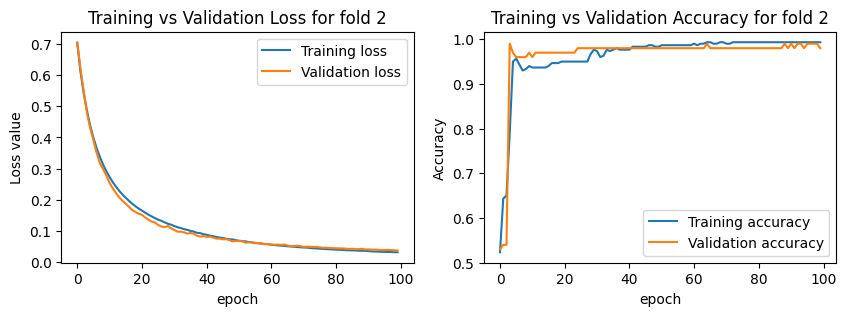

----------------------------------------------------------------------------------------------------
Training for fold 3:
Epoch 1/100
10/10 [==============================] - 1s 35ms/step - loss: 0.6776 - accuracy: 0.6000 - val_loss: 0.5748 - val_accuracy: 0.6900
Epoch 2/100
10/10 [==============================] - 0s 17ms/step - loss: 0.5873 - accuracy: 0.6467 - val_loss: 0.5086 - val_accuracy: 0.9100
Epoch 3/100
10/10 [==============================] - 0s 16ms/step - loss: 0.5180 - accuracy: 0.9100 - val_loss: 0.4480 - val_accuracy: 0.9300
Epoch 4/100
10/10 [==============================] - 0s 17ms/step - loss: 0.4629 - accuracy: 0.9233 - val_loss: 0.3991 - val_accuracy: 0.9300
Epoch 5/100
10/10 [==============================] - 0s 16ms/step - loss: 0.4195 - accuracy: 0.9267 - val_loss: 0.3644 - val_accuracy: 0.9300
Epoch 6/100
10/10 [==============================] - 0s 16ms/step - loss: 0.3835 - accuracy: 0.9233 - val_loss: 0.3381 - val_accuracy: 0.9200
Epoch 7/100
10/10 [=======

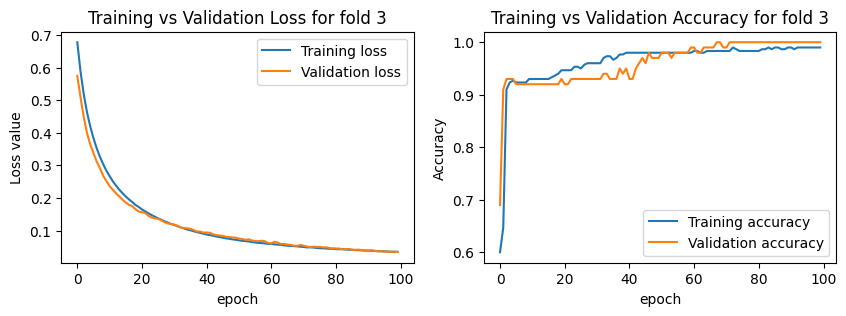

----------------------------------------------------------------------------------------------------
Training for fold 4:
Epoch 1/100
10/10 [==============================] - 1s 36ms/step - loss: 0.7500 - accuracy: 0.4067 - val_loss: 0.6669 - val_accuracy: 0.5900
Epoch 2/100
10/10 [==============================] - 0s 17ms/step - loss: 0.6483 - accuracy: 0.5833 - val_loss: 0.5938 - val_accuracy: 0.6100
Epoch 3/100
10/10 [==============================] - 0s 17ms/step - loss: 0.5755 - accuracy: 0.6167 - val_loss: 0.5373 - val_accuracy: 0.6800
Epoch 4/100
10/10 [==============================] - 0s 16ms/step - loss: 0.5139 - accuracy: 0.8567 - val_loss: 0.4941 - val_accuracy: 0.8700
Epoch 5/100
10/10 [==============================] - 0s 17ms/step - loss: 0.4694 - accuracy: 0.9300 - val_loss: 0.4573 - val_accuracy: 0.8900
Epoch 6/100
10/10 [==============================] - 0s 17ms/step - loss: 0.4242 - accuracy: 0.9467 - val_loss: 0.4200 - val_accuracy: 0.9100
Epoch 7/100
10/10 [=======

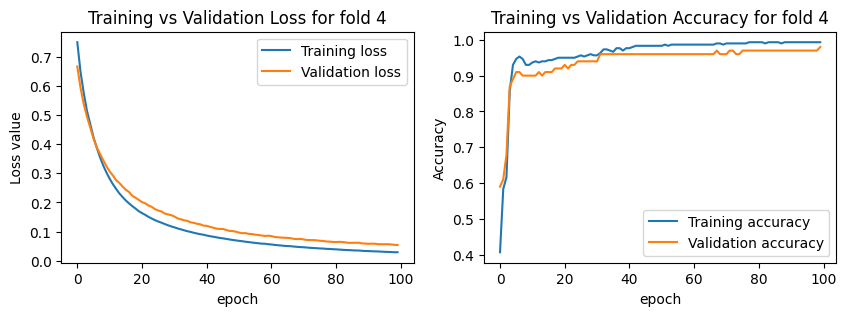

Execution Time = 81.45332074165344 seconds
----------------------------------------------------------------------------------------------------
Score per fold
----------------------------------------------------------------------------------------------------
> Fold 1 - Loss: 0.035929158329963684 - Accuracy: 99.00000095367432%
----------------------------------------------------------------------------------------------------
> Fold 2 - Loss: 0.03644539415836334 - Accuracy: 98.00000190734863%
----------------------------------------------------------------------------------------------------
> Fold 3 - Loss: 0.034783829003572464 - Accuracy: 100.0%
----------------------------------------------------------------------------------------------------
> Fold 4 - Loss: 0.05392713472247124 - Accuracy: 98.00000190734863%
----------------------------------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 98.7500011920929 (+- 0.829155406

In [74]:
num_folds = 4
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=12)
acc_per_fold = []
loss_per_fold = []

num_epochs = 100
# K-fold Cross Validation model evaluation
fold = 1
start_time = time.time()
for train, test in kfold.split(X, y):

  # Define the model architecture: neural network with one hidden layer
  model = Sequential()
    
  # hidden layer with different activation function: relu, tanh, sigmoid and without activation function
  model.add(Dense(units=60, input_dim=X.shape[1], activation='tanh'))
  # output layer
  model.add(Dense(units=1, activation='sigmoid'))

  # Compile the model
  model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])


  print('-----'*20)
  print(f'Training for fold {fold}:')

  # Fit data to model
  history = model.fit(X[train], y[train],
              epochs=num_epochs,
              validation_data=(X[test], y[test]),
              verbose=1)

  # Validation metrics
  scores = model.evaluate(X[test], y[test], verbose=0)
  print(f'Score for fold {fold}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])
    
  # plotting loss
  plt.figure(figsize=(10, 3))
  plt.subplot(1, 2, 1)
  plt.plot(history.history['loss'], label="Training loss")
  plt.plot(history.history['val_loss'], label="Validation loss")
  plt.legend()
  plt.title(f"Training vs Validation Loss for fold {fold}")
  plt.ylabel('Loss value')
  plt.xlabel('epoch')  
  
  # plotting accuracy
  plt.subplot(1, 2, 2)
  plt.plot(history.history['accuracy'], label="Training accuracy")
  plt.plot(history.history['val_accuracy'], label="Validation accuracy")
  plt.legend()
  plt.title(f"Training vs Validation Accuracy for fold {fold}")
  plt.ylabel('Accuracy')
  plt.xlabel('epoch')
  plt.show()

  fold = fold + 1

end_time = time.time()
print(f'Execution Time = {end_time - start_time} seconds')

# Average scores
print('-----'*20)
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('-----'*20)
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('-----'*20)
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')

**Neural network with `one` hidden layer and with `different batch size(4, 32, 64)`**

----------------------------------------------------------------------------------------------------
Training for fold 1:
Epoch 1/100
5/5 [==============================] - 1s 76ms/step - loss: 0.6420 - accuracy: 0.6300 - val_loss: 0.6255 - val_accuracy: 0.6100
Epoch 2/100
5/5 [==============================] - 0s 24ms/step - loss: 0.5984 - accuracy: 0.6300 - val_loss: 0.5844 - val_accuracy: 0.6100
Epoch 3/100
5/5 [==============================] - 0s 25ms/step - loss: 0.5604 - accuracy: 0.6300 - val_loss: 0.5465 - val_accuracy: 0.6100
Epoch 4/100
5/5 [==============================] - 0s 23ms/step - loss: 0.5233 - accuracy: 0.6300 - val_loss: 0.5136 - val_accuracy: 0.6100
Epoch 5/100
5/5 [==============================] - 0s 24ms/step - loss: 0.4932 - accuracy: 0.7133 - val_loss: 0.4829 - val_accuracy: 0.8900
Epoch 6/100
5/5 [==============================] - 0s 24ms/step - loss: 0.4625 - accuracy: 0.9367 - val_loss: 0.4560 - val_accuracy: 0.9600
Epoch 7/100
5/5 [=====================

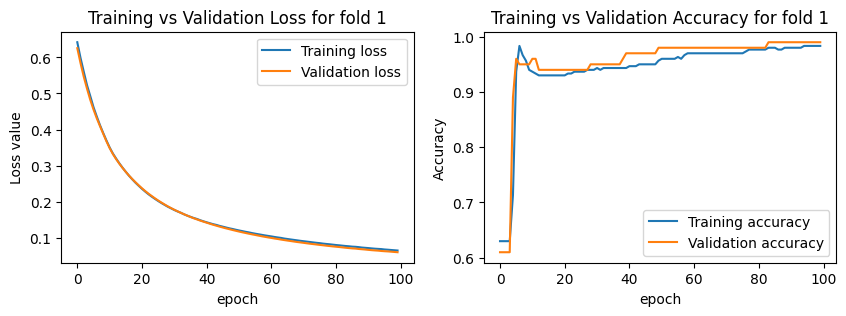

----------------------------------------------------------------------------------------------------
Training for fold 2:
Epoch 1/100
5/5 [==============================] - 1s 66ms/step - loss: 0.5716 - accuracy: 0.6533 - val_loss: 0.5758 - val_accuracy: 0.5400
Epoch 2/100
5/5 [==============================] - 0s 22ms/step - loss: 0.5362 - accuracy: 0.6533 - val_loss: 0.5412 - val_accuracy: 0.5400
Epoch 3/100
5/5 [==============================] - 0s 24ms/step - loss: 0.5044 - accuracy: 0.6767 - val_loss: 0.5066 - val_accuracy: 0.7700
Epoch 4/100
5/5 [==============================] - 0s 22ms/step - loss: 0.4747 - accuracy: 0.8700 - val_loss: 0.4769 - val_accuracy: 1.0000
Epoch 5/100
5/5 [==============================] - 0s 23ms/step - loss: 0.4483 - accuracy: 0.9667 - val_loss: 0.4485 - val_accuracy: 0.9800
Epoch 6/100
5/5 [==============================] - 0s 23ms/step - loss: 0.4245 - accuracy: 0.9667 - val_loss: 0.4227 - val_accuracy: 0.9700
Epoch 7/100
5/5 [=====================

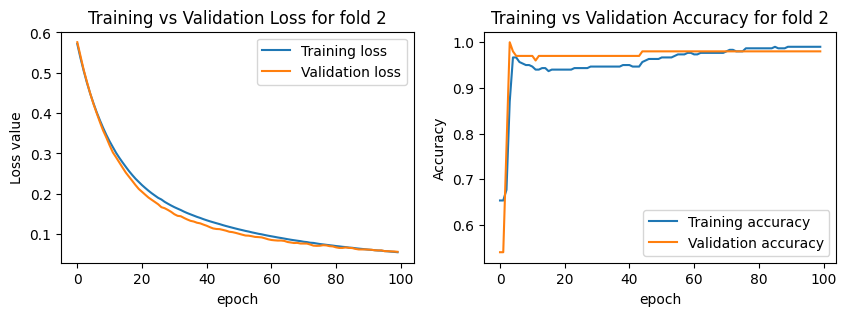

----------------------------------------------------------------------------------------------------
Training for fold 3:
Epoch 1/100
5/5 [==============================] - 1s 68ms/step - loss: 0.7352 - accuracy: 0.5200 - val_loss: 0.6757 - val_accuracy: 0.6400
Epoch 2/100
5/5 [==============================] - 0s 22ms/step - loss: 0.6962 - accuracy: 0.5500 - val_loss: 0.6393 - val_accuracy: 0.6700
Epoch 3/100
5/5 [==============================] - 0s 22ms/step - loss: 0.6583 - accuracy: 0.5900 - val_loss: 0.6039 - val_accuracy: 0.6800
Epoch 4/100
5/5 [==============================] - 0s 23ms/step - loss: 0.6231 - accuracy: 0.6000 - val_loss: 0.5713 - val_accuracy: 0.6800
Epoch 5/100
5/5 [==============================] - 0s 23ms/step - loss: 0.5912 - accuracy: 0.6033 - val_loss: 0.5406 - val_accuracy: 0.7000
Epoch 6/100
5/5 [==============================] - 0s 22ms/step - loss: 0.5594 - accuracy: 0.6567 - val_loss: 0.5116 - val_accuracy: 0.8200
Epoch 7/100
5/5 [=====================

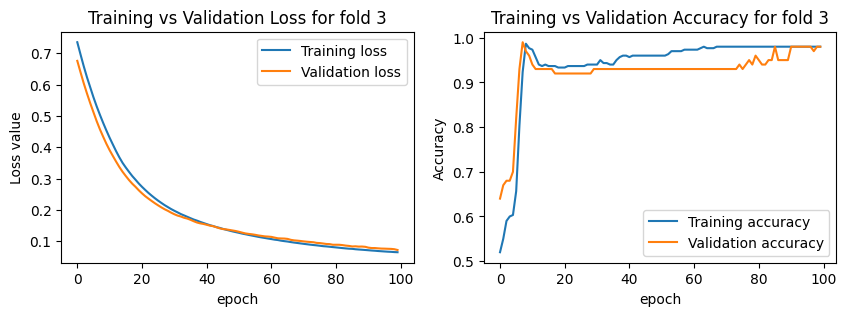

----------------------------------------------------------------------------------------------------
Training for fold 4:
Epoch 1/100
5/5 [==============================] - 1s 73ms/step - loss: 0.7197 - accuracy: 0.4733 - val_loss: 0.6741 - val_accuracy: 0.5300
Epoch 2/100
5/5 [==============================] - 0s 23ms/step - loss: 0.6716 - accuracy: 0.5600 - val_loss: 0.6324 - val_accuracy: 0.6000
Epoch 3/100
5/5 [==============================] - 0s 23ms/step - loss: 0.6288 - accuracy: 0.5933 - val_loss: 0.5960 - val_accuracy: 0.6300
Epoch 4/100
5/5 [==============================] - 0s 25ms/step - loss: 0.5902 - accuracy: 0.6100 - val_loss: 0.5639 - val_accuracy: 0.6500
Epoch 5/100
5/5 [==============================] - 0s 30ms/step - loss: 0.5548 - accuracy: 0.6133 - val_loss: 0.5347 - val_accuracy: 0.6700
Epoch 6/100
5/5 [==============================] - 0s 24ms/step - loss: 0.5223 - accuracy: 0.6867 - val_loss: 0.5070 - val_accuracy: 0.7900
Epoch 7/100
5/5 [=====================

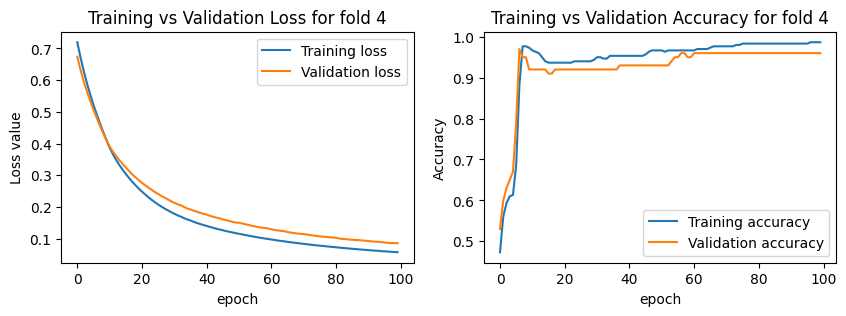

Execution Time = 55.0424280166626 seconds
----------------------------------------------------------------------------------------------------
Score per fold
----------------------------------------------------------------------------------------------------
> Fold 1 - Loss: 0.06026909500360489 - Accuracy: 99.00000095367432%
----------------------------------------------------------------------------------------------------
> Fold 2 - Loss: 0.05614747107028961 - Accuracy: 98.00000190734863%
----------------------------------------------------------------------------------------------------
> Fold 3 - Loss: 0.07177061587572098 - Accuracy: 98.00000190734863%
----------------------------------------------------------------------------------------------------
> Fold 4 - Loss: 0.08624523133039474 - Accuracy: 95.99999785423279%
----------------------------------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 97.75000065565109 (+- 1

In [83]:
num_folds = 4
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=12)
acc_per_fold = []
loss_per_fold = []

num_epochs = 100
# K-fold Cross Validation model evaluation
fold = 1
start_time = time.time()
for train, test in kfold.split(X, y):

  # Define the model architecture: neural network with one hidden layer 
  model = Sequential()
    
  # hidden layer with activation function relu
  model.add(Dense(units=60, input_dim=X.shape[1], activation='relu'))
  # output layer
  model.add(Dense(units=1, activation='sigmoid'))

  # Compile the model
  model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])


  print('-----'*20)
  print(f'Training for fold {fold}:')

  # Fit data to model with different batch size: 4, 32, 64
  history = model.fit(X[train], y[train],
              batch_size = 64,
              epochs=num_epochs,
              validation_data=(X[test], y[test]),
              verbose=1)

  # Validation metrics
  scores = model.evaluate(X[test], y[test], verbose=0)
  print(f'Score for fold {fold}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])
    
  # plotting loss
  plt.figure(figsize=(10, 3))
  plt.subplot(1, 2, 1)
  plt.plot(history.history['loss'], label="Training loss")
  plt.plot(history.history['val_loss'], label="Validation loss")
  plt.legend()
  plt.title(f"Training vs Validation Loss for fold {fold}")
  plt.ylabel('Loss value')
  plt.xlabel('epoch')  
  
  # plotting accuracy
  plt.subplot(1, 2, 2)
  plt.plot(history.history['accuracy'], label="Training accuracy")
  plt.plot(history.history['val_accuracy'], label="Validation accuracy")
  plt.legend()
  plt.title(f"Training vs Validation Accuracy for fold {fold}")
  plt.ylabel('Accuracy')
  plt.xlabel('epoch')
  plt.show()

  fold = fold + 1

end_time = time.time()
print(f'Execution Time = {end_time - start_time} seconds')

# Average scores
print('-----'*20)
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('-----'*20)
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('-----'*20)
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')

### Best Neural Network

- `First approach` for evaluating performance of model: Splitting data to two parts: train and test(validation)

----------------------------------------------------------------------------------------------------
Training for fold 1:
Epoch 1/200
10/10 [==============================] - 1s 52ms/step - loss: 0.7108 - accuracy: 0.4533 - val_loss: 0.6618 - val_accuracy: 0.5600
Epoch 2/200
10/10 [==============================] - 0s 18ms/step - loss: 0.6211 - accuracy: 0.6633 - val_loss: 0.5916 - val_accuracy: 0.6100
Epoch 3/200
10/10 [==============================] - 0s 18ms/step - loss: 0.5480 - accuracy: 0.7667 - val_loss: 0.5361 - val_accuracy: 0.7200
Epoch 4/200
10/10 [==============================] - 0s 19ms/step - loss: 0.4996 - accuracy: 0.7967 - val_loss: 0.4845 - val_accuracy: 0.9900
Epoch 5/200
10/10 [==============================] - 0s 23ms/step - loss: 0.4469 - accuracy: 0.9300 - val_loss: 0.4382 - val_accuracy: 0.9800
Epoch 6/200
10/10 [==============================] - 0s 19ms/step - loss: 0.4055 - accuracy: 0.9300 - val_loss: 0.3976 - val_accuracy: 0.9400
Epoch 7/200
10/10 [=======

10/10 [==============================] - 0s 20ms/step - loss: 0.0302 - accuracy: 0.9933 - val_loss: 0.0317 - val_accuracy: 0.9900
Epoch 115/200
10/10 [==============================] - 0s 17ms/step - loss: 0.0344 - accuracy: 0.9933 - val_loss: 0.0305 - val_accuracy: 0.9900
Epoch 116/200
10/10 [==============================] - 0s 18ms/step - loss: 0.0417 - accuracy: 0.9867 - val_loss: 0.0294 - val_accuracy: 0.9900
Epoch 117/200
10/10 [==============================] - 0s 25ms/step - loss: 0.0309 - accuracy: 0.9933 - val_loss: 0.0293 - val_accuracy: 0.9900
Epoch 118/200
10/10 [==============================] - 0s 24ms/step - loss: 0.0312 - accuracy: 0.9867 - val_loss: 0.0295 - val_accuracy: 0.9900
Epoch 119/200
10/10 [==============================] - 0s 25ms/step - loss: 0.0322 - accuracy: 0.9933 - val_loss: 0.0299 - val_accuracy: 0.9900
Epoch 120/200
10/10 [==============================] - 0s 24ms/step - loss: 0.0309 - accuracy: 0.9900 - val_loss: 0.0290 - val_accuracy: 0.9900
Epoch 

Epoch 171/200
10/10 [==============================] - 0s 18ms/step - loss: 0.0203 - accuracy: 0.9967 - val_loss: 0.0236 - val_accuracy: 0.9900
Epoch 172/200
10/10 [==============================] - 0s 19ms/step - loss: 0.0218 - accuracy: 0.9933 - val_loss: 0.0223 - val_accuracy: 0.9900
Epoch 173/200
10/10 [==============================] - 0s 19ms/step - loss: 0.0168 - accuracy: 0.9933 - val_loss: 0.0228 - val_accuracy: 0.9900
Epoch 174/200
10/10 [==============================] - 0s 18ms/step - loss: 0.0200 - accuracy: 0.9933 - val_loss: 0.0221 - val_accuracy: 0.9900
Epoch 175/200
10/10 [==============================] - 0s 20ms/step - loss: 0.0210 - accuracy: 0.9933 - val_loss: 0.0207 - val_accuracy: 0.9900
Epoch 176/200
10/10 [==============================] - 0s 19ms/step - loss: 0.0230 - accuracy: 0.9933 - val_loss: 0.0227 - val_accuracy: 0.9900
Epoch 177/200
10/10 [==============================] - 0s 19ms/step - loss: 0.0174 - accuracy: 0.9967 - val_loss: 0.0227 - val_accuracy:

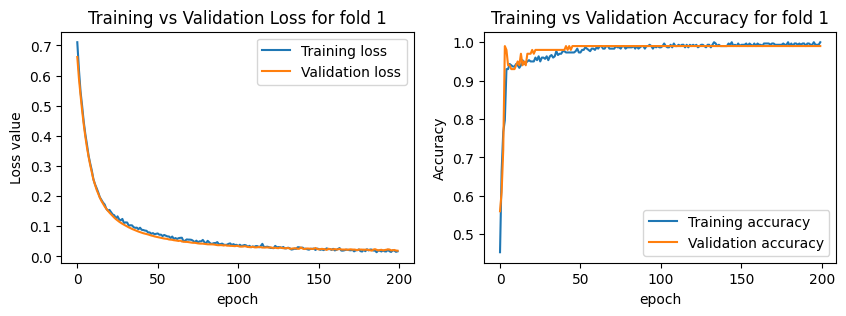

Score for fold 1: loss of 0.018978707492351532; accuracy of 99.00000095367432%
4/4 [==============================] - 0s 5ms/step
[[39  0]
 [ 1 60]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        39
           1       1.00      0.98      0.99        61

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

----------------------------------------------------------------------------------------------------
Training for fold 2:
Epoch 1/200
10/10 [==============================] - 1s 49ms/step - loss: 0.6837 - accuracy: 0.5800 - val_loss: 0.6279 - val_accuracy: 0.5500
Epoch 2/200
10/10 [==============================] - 0s 19ms/step - loss: 0.5777 - accuracy: 0.7100 - val_loss: 0.5646 - val_accuracy: 0.5400
Epoch 3/200
10/10 [==============================] - 0s 18ms/step - loss: 0.5029 - accuracy: 0.7100 - val_loss: 0.4995

10/10 [==============================] - 0s 19ms/step - loss: 0.0276 - accuracy: 0.9933 - val_loss: 0.0320 - val_accuracy: 0.9800
Epoch 112/200
10/10 [==============================] - 0s 20ms/step - loss: 0.0294 - accuracy: 0.9933 - val_loss: 0.0316 - val_accuracy: 0.9800
Epoch 113/200
10/10 [==============================] - 0s 18ms/step - loss: 0.0241 - accuracy: 0.9933 - val_loss: 0.0314 - val_accuracy: 0.9800
Epoch 114/200
10/10 [==============================] - 0s 21ms/step - loss: 0.0318 - accuracy: 0.9933 - val_loss: 0.0312 - val_accuracy: 0.9800
Epoch 115/200
10/10 [==============================] - 0s 20ms/step - loss: 0.0287 - accuracy: 0.9933 - val_loss: 0.0309 - val_accuracy: 0.9800
Epoch 116/200
10/10 [==============================] - 0s 19ms/step - loss: 0.0244 - accuracy: 0.9933 - val_loss: 0.0308 - val_accuracy: 0.9800
Epoch 117/200
10/10 [==============================] - 0s 20ms/step - loss: 0.0278 - accuracy: 0.9933 - val_loss: 0.0306 - val_accuracy: 0.9800
Epoch 

Epoch 168/200
10/10 [==============================] - 0s 16ms/step - loss: 0.0177 - accuracy: 0.9933 - val_loss: 0.0215 - val_accuracy: 1.0000
Epoch 169/200
10/10 [==============================] - 0s 17ms/step - loss: 0.0196 - accuracy: 0.9933 - val_loss: 0.0216 - val_accuracy: 1.0000
Epoch 170/200
10/10 [==============================] - 0s 17ms/step - loss: 0.0213 - accuracy: 0.9933 - val_loss: 0.0214 - val_accuracy: 1.0000
Epoch 171/200
10/10 [==============================] - 0s 18ms/step - loss: 0.0176 - accuracy: 0.9933 - val_loss: 0.0213 - val_accuracy: 1.0000
Epoch 172/200
10/10 [==============================] - 0s 17ms/step - loss: 0.0156 - accuracy: 0.9967 - val_loss: 0.0211 - val_accuracy: 1.0000
Epoch 173/200
10/10 [==============================] - 0s 17ms/step - loss: 0.0196 - accuracy: 0.9967 - val_loss: 0.0209 - val_accuracy: 1.0000
Epoch 174/200
10/10 [==============================] - 0s 25ms/step - loss: 0.0227 - accuracy: 0.9933 - val_loss: 0.0209 - val_accuracy:

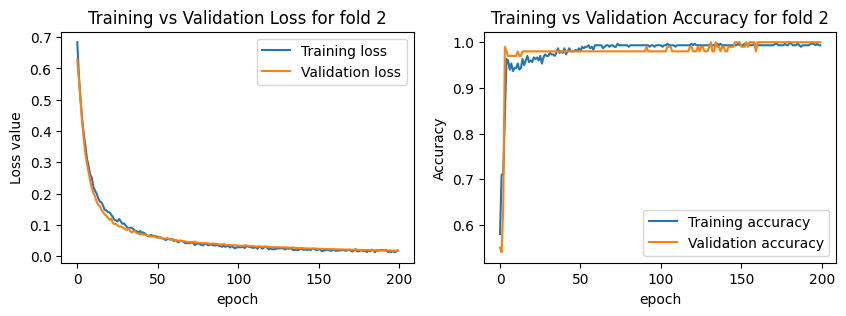

Score for fold 2: loss of 0.017648503184318542; accuracy of 100.0%
4/4 [==============================] - 0s 4ms/step
[[46  0]
 [ 0 54]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        54

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

----------------------------------------------------------------------------------------------------
Training for fold 3:
Epoch 1/200
10/10 [==============================] - 1s 49ms/step - loss: 0.6491 - accuracy: 0.6633 - val_loss: 0.5733 - val_accuracy: 0.9300
Epoch 2/200
10/10 [==============================] - 0s 24ms/step - loss: 0.5649 - accuracy: 0.8200 - val_loss: 0.4929 - val_accuracy: 0.9700
Epoch 3/200
10/10 [==============================] - 0s 20ms/step - loss: 0.4980 - accuracy: 0.8933 - val_loss: 0.4342 - val_accur

10/10 [==============================] - 0s 18ms/step - loss: 0.0277 - accuracy: 0.9900 - val_loss: 0.0242 - val_accuracy: 1.0000
Epoch 112/200
10/10 [==============================] - 0s 26ms/step - loss: 0.0246 - accuracy: 0.9933 - val_loss: 0.0248 - val_accuracy: 1.0000
Epoch 113/200
10/10 [==============================] - 0s 24ms/step - loss: 0.0285 - accuracy: 0.9900 - val_loss: 0.0251 - val_accuracy: 1.0000
Epoch 114/200
10/10 [==============================] - 0s 27ms/step - loss: 0.0271 - accuracy: 0.9900 - val_loss: 0.0236 - val_accuracy: 1.0000
Epoch 115/200
10/10 [==============================] - 0s 17ms/step - loss: 0.0325 - accuracy: 0.9900 - val_loss: 0.0234 - val_accuracy: 1.0000
Epoch 116/200
10/10 [==============================] - 0s 17ms/step - loss: 0.0283 - accuracy: 0.9867 - val_loss: 0.0238 - val_accuracy: 1.0000
Epoch 117/200
10/10 [==============================] - 0s 19ms/step - loss: 0.0317 - accuracy: 0.9900 - val_loss: 0.0228 - val_accuracy: 1.0000
Epoch 

Epoch 168/200
10/10 [==============================] - 0s 17ms/step - loss: 0.0174 - accuracy: 0.9967 - val_loss: 0.0153 - val_accuracy: 1.0000
Epoch 169/200
10/10 [==============================] - 0s 17ms/step - loss: 0.0219 - accuracy: 0.9933 - val_loss: 0.0152 - val_accuracy: 1.0000
Epoch 170/200
10/10 [==============================] - 0s 17ms/step - loss: 0.0216 - accuracy: 0.9933 - val_loss: 0.0154 - val_accuracy: 1.0000
Epoch 171/200
10/10 [==============================] - 0s 17ms/step - loss: 0.0186 - accuracy: 0.9967 - val_loss: 0.0151 - val_accuracy: 1.0000
Epoch 172/200
10/10 [==============================] - 0s 18ms/step - loss: 0.0164 - accuracy: 0.9933 - val_loss: 0.0148 - val_accuracy: 1.0000
Epoch 173/200
10/10 [==============================] - 0s 17ms/step - loss: 0.0204 - accuracy: 0.9933 - val_loss: 0.0147 - val_accuracy: 1.0000
Epoch 174/200
10/10 [==============================] - 0s 17ms/step - loss: 0.0198 - accuracy: 0.9933 - val_loss: 0.0145 - val_accuracy:

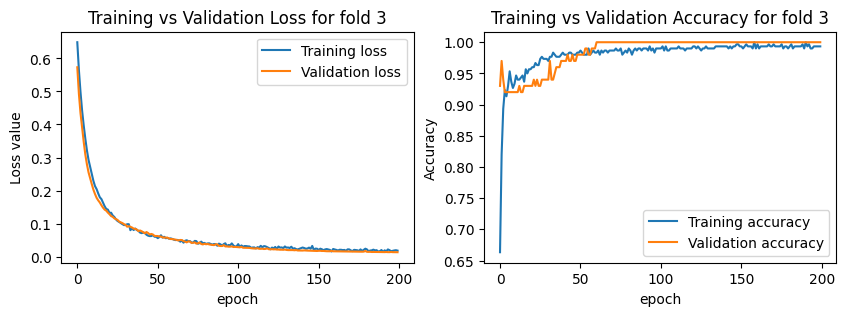

Score for fold 3: loss of 0.013162778690457344; accuracy of 100.0%
4/4 [==============================] - 0s 7ms/step
[[31  0]
 [ 0 69]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        69

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

----------------------------------------------------------------------------------------------------
Training for fold 4:
Epoch 1/200
10/10 [==============================] - 2s 49ms/step - loss: 0.6604 - accuracy: 0.6333 - val_loss: 0.5889 - val_accuracy: 0.9200
Epoch 2/200
10/10 [==============================] - 0s 21ms/step - loss: 0.5669 - accuracy: 0.8167 - val_loss: 0.5107 - val_accuracy: 0.9700
Epoch 3/200
10/10 [==============================] - 0s 24ms/step - loss: 0.4927 - accuracy: 0.9033 - val_loss: 0.4518 - val_accur

10/10 [==============================] - 0s 20ms/step - loss: 0.0272 - accuracy: 0.9967 - val_loss: 0.0457 - val_accuracy: 0.9900
Epoch 112/200
10/10 [==============================] - 0s 18ms/step - loss: 0.0263 - accuracy: 0.9900 - val_loss: 0.0442 - val_accuracy: 0.9900
Epoch 113/200
10/10 [==============================] - 0s 18ms/step - loss: 0.0230 - accuracy: 0.9967 - val_loss: 0.0440 - val_accuracy: 0.9900
Epoch 114/200
10/10 [==============================] - 0s 21ms/step - loss: 0.0234 - accuracy: 0.9967 - val_loss: 0.0442 - val_accuracy: 0.9900
Epoch 115/200
10/10 [==============================] - 0s 25ms/step - loss: 0.0208 - accuracy: 0.9933 - val_loss: 0.0446 - val_accuracy: 0.9900
Epoch 116/200
10/10 [==============================] - 0s 21ms/step - loss: 0.0215 - accuracy: 0.9967 - val_loss: 0.0434 - val_accuracy: 0.9900
Epoch 117/200
10/10 [==============================] - 0s 31ms/step - loss: 0.0212 - accuracy: 0.9967 - val_loss: 0.0439 - val_accuracy: 0.9900
Epoch 

Epoch 168/200
10/10 [==============================] - 0s 22ms/step - loss: 0.0136 - accuracy: 0.9967 - val_loss: 0.0368 - val_accuracy: 0.9900
Epoch 169/200
10/10 [==============================] - 0s 19ms/step - loss: 0.0131 - accuracy: 0.9967 - val_loss: 0.0377 - val_accuracy: 0.9900
Epoch 170/200
10/10 [==============================] - 0s 19ms/step - loss: 0.0132 - accuracy: 0.9967 - val_loss: 0.0380 - val_accuracy: 0.9900
Epoch 171/200
10/10 [==============================] - 0s 22ms/step - loss: 0.0147 - accuracy: 0.9967 - val_loss: 0.0368 - val_accuracy: 0.9900
Epoch 172/200
10/10 [==============================] - 0s 32ms/step - loss: 0.0141 - accuracy: 0.9967 - val_loss: 0.0363 - val_accuracy: 0.9900
Epoch 173/200
10/10 [==============================] - 0s 25ms/step - loss: 0.0130 - accuracy: 0.9967 - val_loss: 0.0363 - val_accuracy: 0.9900
Epoch 174/200
10/10 [==============================] - 0s 21ms/step - loss: 0.0120 - accuracy: 0.9967 - val_loss: 0.0364 - val_accuracy:

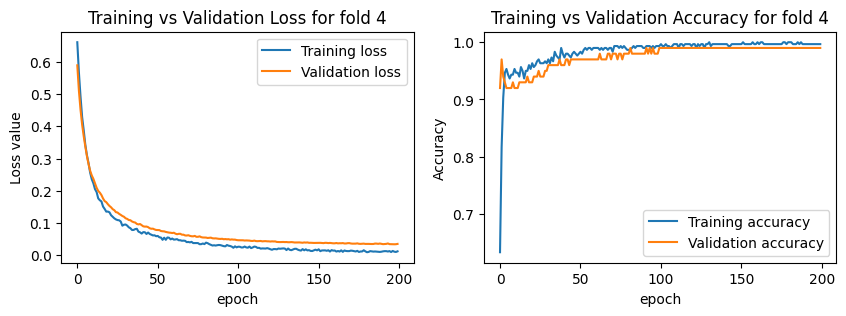

Score for fold 4: loss of 0.03547302633523941; accuracy of 99.00000095367432%
4/4 [==============================] - 0s 8ms/step
[[34  0]
 [ 1 65]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       1.00      0.98      0.99        66

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

Execution Time = 176.71863412857056 seconds
----------------------------------------------------------------------------------------------------
Score per fold
----------------------------------------------------------------------------------------------------
> Fold 1 - Loss: 0.018978707492351532 - Accuracy: 99.00000095367432%
----------------------------------------------------------------------------------------------------
> Fold 2 - Loss: 0.017648503184318542 - Accuracy: 100.0%
-------------------------------------

In [154]:
num_folds = 4
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=12)
acc_per_fold = []
loss_per_fold = []

num_epochs = 200
# K-fold Cross Validation model evaluation
fold = 1
start_time = time.time()
for train, test in kfold.split(X, y):

  # Define the model architecture: neural network with one hidden layer 
  model = Sequential()
    
  # hidden layer with activation function relu
  model.add(Dense(units=100, input_dim=X.shape[1], activation='relu'))
  model.add(Dropout(0.2))

  # output layer
  model.add(Dense(units=1, activation='sigmoid'))

  # Compile the model
  model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])


  print('-----'*20)
  print(f'Training for fold {fold}:')

  # Fit data to model with batch size: 32
  history = model.fit(X[train], y[train],
              batch_size = 32,
              epochs=num_epochs,
              validation_data=(X[test], y[test]),
              verbose=1)
    
  # plotting loss
  plt.figure(figsize=(10, 3))
  plt.subplot(1, 2, 1)
  plt.plot(history.history['loss'], label="Training loss")
  plt.plot(history.history['val_loss'], label="Validation loss")
  plt.legend()
  plt.title(f"Training vs Validation Loss for fold {fold}")
  plt.ylabel('Loss value')
  plt.xlabel('epoch')  
  
  # plotting accuracy
  plt.subplot(1, 2, 2)
  plt.plot(history.history['accuracy'], label="Training accuracy")
  plt.plot(history.history['val_accuracy'], label="Validation accuracy")
  plt.legend()
  plt.title(f"Training vs Validation Accuracy for fold {fold}")
  plt.ylabel('Accuracy')
  plt.xlabel('epoch')
  plt.show()


  # Validation metrics
  scores = model.evaluate(X[test], y[test], verbose=0)
  print(f'Score for fold {fold}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])
    
  # Prediction, confusion matrix and classification report
  y_predict = (model.predict(X[test]) > 0.5).astype('int32')
  print(confusion_matrix(y[test], y_predict))
  print(classification_report(y[test], y_predict))


  fold = fold + 1

end_time = time.time()
print(f'Execution Time = {end_time - start_time} seconds')

# Average scores
print('-----'*20)
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('-----'*20)
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('-----'*20)
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')

- `Second approach` for evaluating performance of model: splitting data to 3 parts: train, validation and test

In [99]:
# splitting data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 100)
# because of preserving indices in y_train and y_test after train_test_split their types shoulb be changed to ndarray to sort
# indices. Otherwise, in second part, "for loop" gives error, because, indices start from 1
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

----------------------------------------------------------------------------------------------------
Training for fold 1:
Epoch 1/200
8/8 [==============================] - 1s 46ms/step - loss: 0.7102 - accuracy: 0.4400 - val_loss: 0.6590 - val_accuracy: 0.5067
Epoch 2/200
8/8 [==============================] - 0s 26ms/step - loss: 0.6430 - accuracy: 0.6222 - val_loss: 0.5976 - val_accuracy: 0.8267
Epoch 3/200
8/8 [==============================] - 0s 19ms/step - loss: 0.5802 - accuracy: 0.7467 - val_loss: 0.5462 - val_accuracy: 0.8000
Epoch 4/200
8/8 [==============================] - 0s 25ms/step - loss: 0.5465 - accuracy: 0.7422 - val_loss: 0.5064 - val_accuracy: 0.7600
Epoch 5/200
8/8 [==============================] - 0s 25ms/step - loss: 0.5187 - accuracy: 0.7911 - val_loss: 0.4719 - val_accuracy: 0.9467
Epoch 6/200
8/8 [==============================] - 0s 25ms/step - loss: 0.4829 - accuracy: 0.8400 - val_loss: 0.4404 - val_accuracy: 0.9600
Epoch 7/200
8/8 [=====================

8/8 [==============================] - 0s 24ms/step - loss: 0.0761 - accuracy: 0.9733 - val_loss: 0.0485 - val_accuracy: 0.9867
Epoch 117/200
8/8 [==============================] - 0s 19ms/step - loss: 0.0701 - accuracy: 0.9778 - val_loss: 0.0481 - val_accuracy: 1.0000
Epoch 118/200
8/8 [==============================] - 0s 22ms/step - loss: 0.0726 - accuracy: 0.9733 - val_loss: 0.0477 - val_accuracy: 1.0000
Epoch 119/200
8/8 [==============================] - 0s 22ms/step - loss: 0.0679 - accuracy: 0.9778 - val_loss: 0.0475 - val_accuracy: 1.0000
Epoch 120/200
8/8 [==============================] - 0s 21ms/step - loss: 0.0704 - accuracy: 0.9733 - val_loss: 0.0472 - val_accuracy: 1.0000
Epoch 121/200
8/8 [==============================] - 0s 20ms/step - loss: 0.0617 - accuracy: 0.9867 - val_loss: 0.0472 - val_accuracy: 1.0000
Epoch 122/200
8/8 [==============================] - 0s 25ms/step - loss: 0.0673 - accuracy: 0.9822 - val_loss: 0.0468 - val_accuracy: 1.0000
Epoch 123/200
8/8 [=

Epoch 174/200
8/8 [==============================] - 0s 18ms/step - loss: 0.0422 - accuracy: 0.9822 - val_loss: 0.0309 - val_accuracy: 1.0000
Epoch 175/200
8/8 [==============================] - 0s 22ms/step - loss: 0.0449 - accuracy: 0.9867 - val_loss: 0.0307 - val_accuracy: 1.0000
Epoch 176/200
8/8 [==============================] - 0s 18ms/step - loss: 0.0433 - accuracy: 0.9867 - val_loss: 0.0307 - val_accuracy: 1.0000
Epoch 177/200
8/8 [==============================] - 0s 18ms/step - loss: 0.0414 - accuracy: 0.9911 - val_loss: 0.0305 - val_accuracy: 1.0000
Epoch 178/200
8/8 [==============================] - 0s 19ms/step - loss: 0.0409 - accuracy: 0.9867 - val_loss: 0.0304 - val_accuracy: 1.0000
Epoch 179/200
8/8 [==============================] - 0s 18ms/step - loss: 0.0440 - accuracy: 0.9867 - val_loss: 0.0301 - val_accuracy: 1.0000
Epoch 180/200
8/8 [==============================] - 0s 18ms/step - loss: 0.0465 - accuracy: 0.9867 - val_loss: 0.0308 - val_accuracy: 1.0000
Epoch 

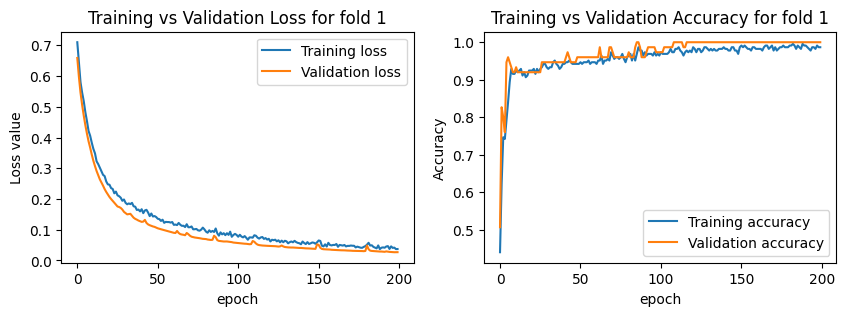

Score for fold 1: loss of 0.02680593729019165; accuracy of 100.0%
3/3 [==============================] - 0s 4ms/step
[[26  0]
 [ 0 49]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        49

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75

----------------------------------------------------------------------------------------------------
Training for fold 2:
Epoch 1/200
8/8 [==============================] - 1s 43ms/step - loss: 0.5574 - accuracy: 0.7600 - val_loss: 0.5231 - val_accuracy: 0.9867
Epoch 2/200
8/8 [==============================] - 0s 19ms/step - loss: 0.4954 - accuracy: 0.8889 - val_loss: 0.4748 - val_accuracy: 0.9333
Epoch 3/200
8/8 [==============================] - 0s 19ms/step - loss: 0.4480 - accuracy: 0.9333 - val_loss: 0.4349 - val_accuracy: 0.

8/8 [==============================] - 0s 18ms/step - loss: 0.0942 - accuracy: 0.9600 - val_loss: 0.1084 - val_accuracy: 0.9467
Epoch 56/200
8/8 [==============================] - 0s 19ms/step - loss: 0.0943 - accuracy: 0.9689 - val_loss: 0.1071 - val_accuracy: 0.9467
Epoch 57/200
8/8 [==============================] - 0s 18ms/step - loss: 0.0944 - accuracy: 0.9600 - val_loss: 0.1060 - val_accuracy: 0.9467
Epoch 58/200
8/8 [==============================] - 0s 18ms/step - loss: 0.0968 - accuracy: 0.9689 - val_loss: 0.1052 - val_accuracy: 0.9467
Epoch 59/200
8/8 [==============================] - 0s 18ms/step - loss: 0.0904 - accuracy: 0.9644 - val_loss: 0.1042 - val_accuracy: 0.9467
Epoch 60/200
8/8 [==============================] - 0s 19ms/step - loss: 0.0929 - accuracy: 0.9600 - val_loss: 0.1041 - val_accuracy: 0.9467
Epoch 61/200
8/8 [==============================] - 0s 19ms/step - loss: 0.0950 - accuracy: 0.9733 - val_loss: 0.0994 - val_accuracy: 0.9467
Epoch 62/200
8/8 [========

Epoch 171/200
8/8 [==============================] - 0s 18ms/step - loss: 0.0400 - accuracy: 0.9867 - val_loss: 0.0612 - val_accuracy: 0.9733
Epoch 172/200
8/8 [==============================] - 0s 18ms/step - loss: 0.0361 - accuracy: 0.9867 - val_loss: 0.0581 - val_accuracy: 0.9733
Epoch 173/200
8/8 [==============================] - 0s 19ms/step - loss: 0.0346 - accuracy: 0.9911 - val_loss: 0.0516 - val_accuracy: 0.9733
Epoch 174/200
8/8 [==============================] - 0s 18ms/step - loss: 0.0340 - accuracy: 0.9867 - val_loss: 0.0480 - val_accuracy: 0.9733
Epoch 175/200
8/8 [==============================] - 0s 19ms/step - loss: 0.0287 - accuracy: 1.0000 - val_loss: 0.0476 - val_accuracy: 0.9733
Epoch 176/200
8/8 [==============================] - 0s 18ms/step - loss: 0.0340 - accuracy: 0.9956 - val_loss: 0.0486 - val_accuracy: 0.9733
Epoch 177/200
8/8 [==============================] - 0s 19ms/step - loss: 0.0321 - accuracy: 0.9911 - val_loss: 0.0505 - val_accuracy: 0.9733
Epoch 

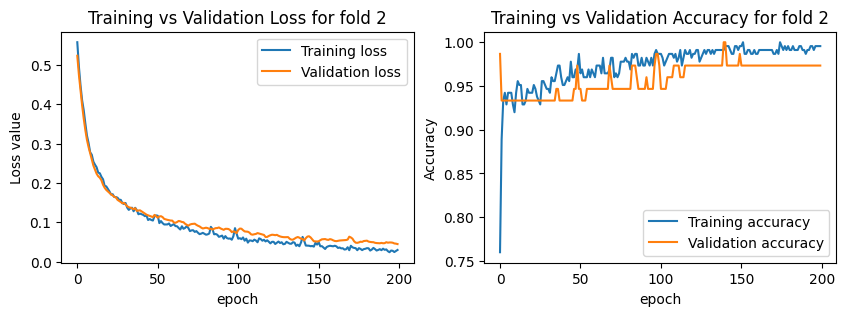

Score for fold 2: loss of 0.04440237954258919; accuracy of 97.33333587646484%
3/3 [==============================] - 0s 7ms/step
[[27  0]
 [ 2 46]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        27
           1       1.00      0.96      0.98        48

    accuracy                           0.97        75
   macro avg       0.97      0.98      0.97        75
weighted avg       0.98      0.97      0.97        75

----------------------------------------------------------------------------------------------------
Training for fold 3:
Epoch 1/200
8/8 [==============================] - 1s 65ms/step - loss: 0.6575 - accuracy: 0.6667 - val_loss: 0.6177 - val_accuracy: 0.8267
Epoch 2/200
8/8 [==============================] - 0s 24ms/step - loss: 0.5974 - accuracy: 0.7600 - val_loss: 0.5704 - val_accuracy: 0.6533
Epoch 3/200
8/8 [==============================] - 0s 25ms/step - loss: 0.5464 - accuracy: 0.7467 - val_loss: 0.5322 - val_

Epoch 55/200
8/8 [==============================] - 0s 18ms/step - loss: 0.1023 - accuracy: 0.9600 - val_loss: 0.1365 - val_accuracy: 0.9467
Epoch 56/200
8/8 [==============================] - 0s 18ms/step - loss: 0.1039 - accuracy: 0.9644 - val_loss: 0.1337 - val_accuracy: 0.9867
Epoch 57/200
8/8 [==============================] - 0s 18ms/step - loss: 0.1132 - accuracy: 0.9733 - val_loss: 0.1307 - val_accuracy: 0.9867
Epoch 58/200
8/8 [==============================] - 0s 18ms/step - loss: 0.1086 - accuracy: 0.9644 - val_loss: 0.1387 - val_accuracy: 0.9333
Epoch 59/200
8/8 [==============================] - 0s 18ms/step - loss: 0.1017 - accuracy: 0.9511 - val_loss: 0.1475 - val_accuracy: 0.9200
Epoch 60/200
8/8 [==============================] - 0s 18ms/step - loss: 0.0947 - accuracy: 0.9467 - val_loss: 0.1413 - val_accuracy: 0.9333
Epoch 61/200
8/8 [==============================] - 0s 18ms/step - loss: 0.0954 - accuracy: 0.9511 - val_loss: 0.1340 - val_accuracy: 0.9333
Epoch 62/200


8/8 [==============================] - 0s 18ms/step - loss: 0.0612 - accuracy: 0.9733 - val_loss: 0.0761 - val_accuracy: 0.9867
Epoch 114/200
8/8 [==============================] - 0s 19ms/step - loss: 0.0586 - accuracy: 0.9778 - val_loss: 0.0748 - val_accuracy: 0.9867
Epoch 115/200
8/8 [==============================] - 0s 18ms/step - loss: 0.0541 - accuracy: 0.9822 - val_loss: 0.0734 - val_accuracy: 0.9867
Epoch 116/200
8/8 [==============================] - 0s 19ms/step - loss: 0.0581 - accuracy: 0.9778 - val_loss: 0.0722 - val_accuracy: 0.9867
Epoch 117/200
8/8 [==============================] - 0s 18ms/step - loss: 0.0553 - accuracy: 0.9778 - val_loss: 0.0717 - val_accuracy: 0.9867
Epoch 118/200
8/8 [==============================] - 0s 18ms/step - loss: 0.0530 - accuracy: 0.9867 - val_loss: 0.0712 - val_accuracy: 0.9867
Epoch 119/200
8/8 [==============================] - 0s 18ms/step - loss: 0.0599 - accuracy: 0.9822 - val_loss: 0.0705 - val_accuracy: 0.9867
Epoch 120/200
8/8 [=

Epoch 171/200
8/8 [==============================] - 0s 18ms/step - loss: 0.0475 - accuracy: 0.9867 - val_loss: 0.0510 - val_accuracy: 0.9867
Epoch 172/200
8/8 [==============================] - 0s 18ms/step - loss: 0.0395 - accuracy: 0.9911 - val_loss: 0.0510 - val_accuracy: 0.9867
Epoch 173/200
8/8 [==============================] - 0s 18ms/step - loss: 0.0402 - accuracy: 0.9867 - val_loss: 0.0502 - val_accuracy: 0.9867
Epoch 174/200
8/8 [==============================] - 0s 18ms/step - loss: 0.0379 - accuracy: 0.9911 - val_loss: 0.0493 - val_accuracy: 0.9867
Epoch 175/200
8/8 [==============================] - 0s 18ms/step - loss: 0.0372 - accuracy: 0.9911 - val_loss: 0.0488 - val_accuracy: 0.9867
Epoch 176/200
8/8 [==============================] - 0s 17ms/step - loss: 0.0417 - accuracy: 0.9911 - val_loss: 0.0487 - val_accuracy: 0.9867
Epoch 177/200
8/8 [==============================] - 0s 19ms/step - loss: 0.0396 - accuracy: 0.9911 - val_loss: 0.0486 - val_accuracy: 0.9867
Epoch 

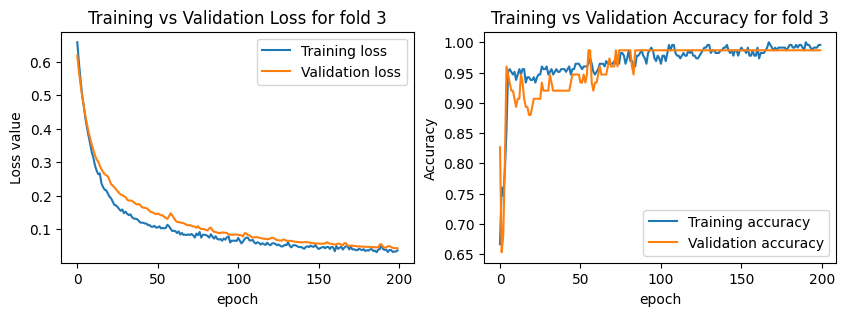

Score for fold 3: loss of 0.04318377003073692; accuracy of 98.66666793823242%
3/3 [==============================] - 0s 4ms/step
[[29  0]
 [ 1 45]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        29
           1       1.00      0.98      0.99        46

    accuracy                           0.99        75
   macro avg       0.98      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75

----------------------------------------------------------------------------------------------------
Training for fold 4:
Epoch 1/200
8/8 [==============================] - 1s 57ms/step - loss: 0.6676 - accuracy: 0.6089 - val_loss: 0.6182 - val_accuracy: 0.8267
Epoch 2/200
8/8 [==============================] - 0s 21ms/step - loss: 0.5962 - accuracy: 0.7956 - val_loss: 0.5662 - val_accuracy: 0.9333
Epoch 3/200
8/8 [==============================] - 0s 20ms/step - loss: 0.5449 - accuracy: 0.8800 - val_loss: 0.5236 - val_

Epoch 55/200
8/8 [==============================] - 0s 21ms/step - loss: 0.1012 - accuracy: 0.9644 - val_loss: 0.1048 - val_accuracy: 0.9600
Epoch 56/200
8/8 [==============================] - 0s 20ms/step - loss: 0.1075 - accuracy: 0.9600 - val_loss: 0.1055 - val_accuracy: 0.9600
Epoch 57/200
8/8 [==============================] - 0s 20ms/step - loss: 0.1017 - accuracy: 0.9689 - val_loss: 0.1041 - val_accuracy: 0.9600
Epoch 58/200
8/8 [==============================] - 0s 21ms/step - loss: 0.1082 - accuracy: 0.9600 - val_loss: 0.1001 - val_accuracy: 0.9600
Epoch 59/200
8/8 [==============================] - 0s 20ms/step - loss: 0.1009 - accuracy: 0.9644 - val_loss: 0.0989 - val_accuracy: 0.9600
Epoch 60/200
8/8 [==============================] - 0s 20ms/step - loss: 0.1020 - accuracy: 0.9600 - val_loss: 0.0978 - val_accuracy: 0.9600
Epoch 61/200
8/8 [==============================] - 0s 21ms/step - loss: 0.1028 - accuracy: 0.9556 - val_loss: 0.0959 - val_accuracy: 0.9600
Epoch 62/200


8/8 [==============================] - 0s 19ms/step - loss: 0.0556 - accuracy: 0.9867 - val_loss: 0.0562 - val_accuracy: 0.9867
Epoch 114/200
8/8 [==============================] - 0s 18ms/step - loss: 0.0557 - accuracy: 0.9822 - val_loss: 0.0550 - val_accuracy: 0.9867
Epoch 115/200
8/8 [==============================] - 0s 19ms/step - loss: 0.0556 - accuracy: 0.9911 - val_loss: 0.0706 - val_accuracy: 0.9867
Epoch 116/200
8/8 [==============================] - 0s 18ms/step - loss: 0.0709 - accuracy: 0.9956 - val_loss: 0.0665 - val_accuracy: 0.9867
Epoch 117/200
8/8 [==============================] - 0s 19ms/step - loss: 0.0597 - accuracy: 0.9956 - val_loss: 0.0574 - val_accuracy: 0.9867
Epoch 118/200
8/8 [==============================] - 0s 19ms/step - loss: 0.0458 - accuracy: 0.9911 - val_loss: 0.0547 - val_accuracy: 0.9867
Epoch 119/200
8/8 [==============================] - 0s 19ms/step - loss: 0.0502 - accuracy: 0.9867 - val_loss: 0.0545 - val_accuracy: 0.9867
Epoch 120/200
8/8 [=

Epoch 171/200
8/8 [==============================] - 0s 31ms/step - loss: 0.0417 - accuracy: 0.9867 - val_loss: 0.0668 - val_accuracy: 0.9600
Epoch 172/200
8/8 [==============================] - 0s 28ms/step - loss: 0.0499 - accuracy: 0.9733 - val_loss: 0.0635 - val_accuracy: 0.9600
Epoch 173/200
8/8 [==============================] - 0s 26ms/step - loss: 0.0440 - accuracy: 0.9822 - val_loss: 0.0568 - val_accuracy: 0.9733
Epoch 174/200
8/8 [==============================] - 0s 21ms/step - loss: 0.0455 - accuracy: 0.9867 - val_loss: 0.0480 - val_accuracy: 0.9867
Epoch 175/200
8/8 [==============================] - 0s 25ms/step - loss: 0.0345 - accuracy: 0.9911 - val_loss: 0.0434 - val_accuracy: 0.9867
Epoch 176/200
8/8 [==============================] - 0s 27ms/step - loss: 0.0360 - accuracy: 0.9956 - val_loss: 0.0437 - val_accuracy: 0.9867
Epoch 177/200
8/8 [==============================] - 0s 28ms/step - loss: 0.0363 - accuracy: 0.9956 - val_loss: 0.0432 - val_accuracy: 0.9867
Epoch 

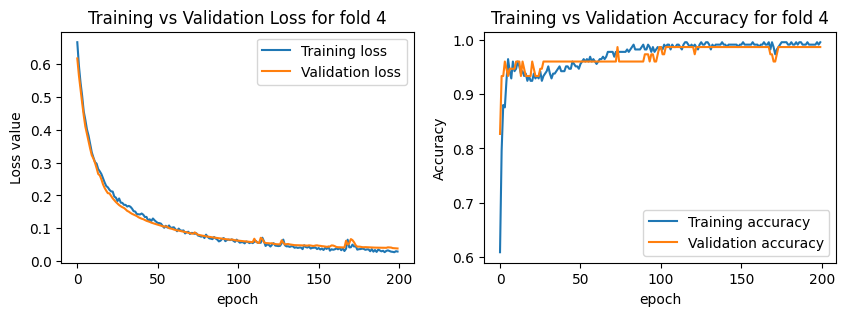

Score for fold 4: loss of 0.03809504210948944; accuracy of 98.66666793823242%
3/3 [==============================] - 0s 5ms/step
[[32  0]
 [ 1 42]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        32
           1       1.00      0.98      0.99        43

    accuracy                           0.99        75
   macro avg       0.98      0.99      0.99        75
weighted avg       0.99      0.99      0.99        75

Execution Time = 135.82297468185425 seconds
----------------------------------------------------------------------------------------------------
Score per fold
----------------------------------------------------------------------------------------------------
> Fold 1 - Loss: 0.02680593729019165 - Accuracy: 100.0%
----------------------------------------------------------------------------------------------------
> Fold 2 - Loss: 0.04440237954258919 - Accuracy: 97.33333587646484%
---------------------------------------

In [100]:
num_folds = 4
kfold = KFold(n_splits=num_folds, shuffle=True)
acc_per_fold = []
loss_per_fold = []

num_epochs = 200
# K-fold Cross Validation model evaluation
fold = 1
start_time = time.time()

#splitting train set to train and validation set
for train, valid in kfold.split(X_train, y_train):

  # Define the model architecture: neural network with one hidden layer 
  model = Sequential()
    
  # hidden layer with activation function relu
  model.add(Dense(units=100, input_dim=X_train.shape[1], activation='relu'))
  model.add(Dropout(0.2))

  # output layer
  model.add(Dense(units=1, activation='sigmoid'))

  # Compile the model
  model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])


  print('-----'*20)
  print(f'Training for fold {fold}:')

  # Fit data to model with batch size: 32
  history = model.fit(X_train[train], y_train[train],
              batch_size = 32,
              epochs=num_epochs,
              validation_data=(X_train[valid], y_train[valid]),
              verbose=1)
    
  # plotting loss
  plt.figure(figsize=(10, 3))
  plt.subplot(1, 2, 1)
  plt.plot(history.history['loss'], label="Training loss")
  plt.plot(history.history['val_loss'], label="Validation loss")
  plt.legend()
  plt.title(f"Training vs Validation Loss for fold {fold}")
  plt.ylabel('Loss value')
  plt.xlabel('epoch')  
  
  # plotting accuracy
  plt.subplot(1, 2, 2)
  plt.plot(history.history['accuracy'], label="Training accuracy")
  plt.plot(history.history['val_accuracy'], label="Validation accuracy")
  plt.legend()
  plt.title(f"Training vs Validation Accuracy for fold {fold}")
  plt.ylabel('Accuracy')
  plt.xlabel('epoch')
  plt.show()


  # Validation metrics
  scores = model.evaluate(X_train[valid], y_train[valid], verbose=0)
  print(f'Score for fold {fold}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])
    
  # Prediction, confusion matrix and classification report
  y_predict = (model.predict(X_train[valid]) > 0.5).astype('int32')
  print(confusion_matrix(y_train[valid], y_predict))
  print(classification_report(y_train[valid], y_predict))


  fold = fold + 1

end_time = time.time()
print(f'Execution Time = {end_time - start_time} seconds')

# Average scores
print('-----'*20)
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('-----'*20)
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('-----'*20)
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')

**Estimating `Generalization` Accuracy by Test set**

In [101]:
# Generalization metrics by test set
scores = model.evaluate(X_test, y_test, verbose=0)
print(f'Generalization Score : Loss of {scores[0]}; Accuracy of {scores[1]*100}%')

Generalization Score : Loss of 0.03335213288664818; Accuracy of 99.00000095367432%


### `For Production Step`: Training model again on `all of data` without data splitting and saving it

In [102]:
num_folds = 4
kfold = KFold(n_splits=num_folds, shuffle=True)
acc_per_fold = []
loss_per_fold = []

num_epochs = 200

# Define the model architecture: neural network with one hidden layer 
model = Sequential()
    
# hidden layer with activation function relu
model.add(Dense(units=100, input_dim=X.shape[1], activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

# Fit data to model
history = model.fit(X, y,
              batch_size = 32,
              epochs=num_epochs,
              verbose=1)

model.save('ckd-model.h5')

Epoch 1/200
13/13 [==============================] - 1s 17ms/step - loss: 0.6002 - accuracy: 0.6925
Epoch 2/200
13/13 [==============================] - 0s 12ms/step - loss: 0.5219 - accuracy: 0.7675
Epoch 3/200
13/13 [==============================] - 0s 11ms/step - loss: 0.4457 - accuracy: 0.9100
Epoch 4/200
13/13 [==============================] - 0s 11ms/step - loss: 0.3884 - accuracy: 0.9325
Epoch 5/200
13/13 [==============================] - 0s 11ms/step - loss: 0.3435 - accuracy: 0.9450
Epoch 6/200
13/13 [==============================] - 0s 11ms/step - loss: 0.3013 - accuracy: 0.9375
Epoch 7/200
13/13 [==============================] - 0s 12ms/step - loss: 0.2658 - accuracy: 0.9325
Epoch 8/200
13/13 [==============================] - 0s 15ms/step - loss: 0.2387 - accuracy: 0.9400
Epoch 9/200
13/13 [==============================] - 0s 14ms/step - loss: 0.2182 - accuracy: 0.9375
Epoch 10/200
13/13 [==============================] - 0s 15ms/step - loss: 0.2055 - accuracy: 0.9400

13/13 [==============================] - 0s 11ms/step - loss: 0.0150 - accuracy: 1.0000
Epoch 163/200
13/13 [==============================] - 0s 10ms/step - loss: 0.0180 - accuracy: 0.9925
Epoch 164/200
13/13 [==============================] - 0s 11ms/step - loss: 0.0149 - accuracy: 0.9950
Epoch 165/200
13/13 [==============================] - 0s 10ms/step - loss: 0.0140 - accuracy: 0.9950
Epoch 166/200
13/13 [==============================] - 0s 11ms/step - loss: 0.0137 - accuracy: 0.9950
Epoch 167/200
13/13 [==============================] - 0s 11ms/step - loss: 0.0128 - accuracy: 0.9975
Epoch 168/200
13/13 [==============================] - 0s 10ms/step - loss: 0.0133 - accuracy: 0.9950
Epoch 169/200
13/13 [==============================] - 0s 10ms/step - loss: 0.0150 - accuracy: 0.9950
Epoch 170/200
13/13 [==============================] - 0s 10ms/step - loss: 0.0174 - accuracy: 0.9950
Epoch 171/200
13/13 [==============================] - 0s 10ms/step - loss: 0.0127 - accuracy: 0

## Second part: Logistic Regression

In [170]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.25)

In [171]:
model = LogisticRegression()

model.fit(X_train, y_train)

print('Train Accuracy:', model.score(X_train, y_train))
print('Validation Accuracy:', model.score(X_valid, y_valid))

Train Accuracy: 0.9833333333333333
Validation Accuracy: 0.97


### Polynomial Features:

In [172]:
train_acc_per_degree = []
valid_acc_per_degree = []

for d in range(1, 6):
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train)
    X_valid_poly = poly.fit_transform(X_valid)

    model.fit(X_train_poly, y_train)
    train_acc_per_degree.append(model.score(X_train_poly, y_train) * 100)
    valid_acc_per_degree.append(model.score(X_valid_poly, y_valid) * 100)
    

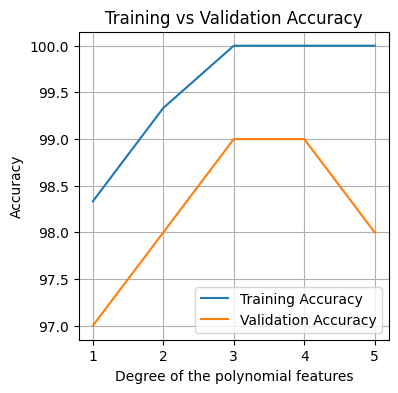

In [174]:
d = [1, 2, 3, 4, 5]
plt.figure(figsize=(4, 4))
plt.plot(d, train_acc_per_degree, label="Training Accuracy")
plt.plot(d, valid_acc_per_degree, label="Validation Accuracy")
plt.legend()
plt.title(f"Training vs Validation Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Degree of the polynomial features')
plt.grid()
plt.show()